IMPORTING ALL NECESSARY LIBRARIES!!
---------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


<B> IMPORTING THE DATASET!!
    
DATASET CONTAINS THE FLIGHT DETAILS FRO NEWDELHI TO MUMBAI ON 9 DIFFERENT DAYS SCRAPED DIRECTLY FROM THE SITE ADANIONE.COM!!

In [2]:
df=pd.read_csv("flights_scraped.csv",index_col=None)

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
df1=df.copy()

In [5]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION,PATH,STOPS,PRICE
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14h 20m,"['DEL', 'JAI', 'BOM']",1 stop,"₹4,581"
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,02h 05m,"['DEL', 'BOM']",Non stop,"₹5,799"
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,02h 05m,"['DEL', 'BOM']",Non stop,"₹5,799"
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,02h 20m,"['DEL', 'BOM']",Non stop,"₹5,899"
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,02h 15m,"['DEL', 'BOM']",Non stop,"₹5,955"


<B> FEATURE ENGINEERING!!

In [6]:
df1['DATE_WEEK']=df1['DATE'].apply(lambda x: x.split(',')[0])

In [7]:
df1['DATE_MONTH']=df1['DATE'].apply(lambda x: x.split(' ')[2])

In [8]:
df1['DATE_DAY']=df1['DATE'].apply(lambda x: x.split(' ')[1])

In [9]:
df1['DATE_DAY']=df1['DATE_DAY'].astype(int)

In [10]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION,PATH,STOPS,PRICE,DATE_WEEK,DATE_MONTH,DATE_DAY
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14h 20m,"['DEL', 'JAI', 'BOM']",1 stop,"₹4,581",Wed,Jan,11
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,02h 05m,"['DEL', 'BOM']",Non stop,"₹5,799",Wed,Jan,11
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,02h 05m,"['DEL', 'BOM']",Non stop,"₹5,799",Wed,Jan,11
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,02h 20m,"['DEL', 'BOM']",Non stop,"₹5,899",Wed,Jan,11
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,02h 15m,"['DEL', 'BOM']",Non stop,"₹5,955",Wed,Jan,11


In [11]:
df1['PRICE']=df1['PRICE'].apply(lambda x: float(x[1:].replace(',','')))

In [12]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION,PATH,STOPS,PRICE,DATE_WEEK,DATE_MONTH,DATE_DAY
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14h 20m,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,02h 05m,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,02h 05m,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,02h 20m,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,02h 15m,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11


In [13]:
df1['DEPARTURE'].unique()

array(['20:10', '18:50', '20:00', '23:00', '22:30', '19:40', '12:50',
       '18:10', '18:00', '10:40', '16:55', '09:45', '19:05', '11:00',
       '21:45', '15:45', '12:00', '17:25', '16:30', '14:15', '20:20',
       '16:25', '10:20', '21:20', '14:35', '14:20', '13:15', '19:25',
       '21:00', '13:30', '15:35', '11:40', '22:25', '20:40', '12:45',
       '15:10', '19:45', '23:40', '13:25', '13:20', '10:55', '19:20',
       '20:55', '17:30', '17:35', '19:00', '21:40', '20:15', '15:05',
       '16:50', '12:25', '16:05', '20:30', '16:10', '11:50', '13:40',
       '10:15', '16:45', '14:10', '14:45', '13:45', '15:30', '17:45',
       '16:35', '21:50', '08:10', '04:55', '07:00', '10:00', '08:45',
       '02:00', '06:30', '04:45', '09:30', '09:00', '17:50', '08:00',
       '05:45', '14:00', '07:20', '06:00', '10:25', '07:15', '14:30',
       '07:30', '06:55', '08:50', '05:35', '06:10', '15:20', '07:40',
       '07:10', '21:30', '05:15', '06:20', '15:25', '06:50', '12:10',
       '02:40', '08:

In [14]:
def form(i):
    re=i.replace('h','').replace('m','').split(' ')
    re=[int(i) for i in re]
    re[1]=round(re[1]/60,2)
    return(float(sum(re)))

In [15]:
df1['DURATION']=df1['DURATION'].apply(form)

In [16]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION,PATH,STOPS,PRICE,DATE_WEEK,DATE_MONTH,DATE_DAY
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11


In [17]:
df1.rename(columns={'DURATION':'DURATION(hrs)','PRICE':'PRICE(Rs)'},inplace=True)

In [18]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),PATH,STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11


In [19]:
df1['NUMBER OF DAYS LEFT ']=df1['DATE_DAY']-11

In [20]:
#df1['DEPARTURE'] = pd.to_datetime(df1['DEPARTURE'])

#df1['ARRIVAL']=pd.to_datetime(df1['ARRIVAL'])

In [21]:
df1

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),PATH,STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY,NUMBER OF DAYS LEFT
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11,0
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11,0
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,"Fri, 20 Jan",Air India,New Delhi,Mumbai,10:55,16:50,5.92,"['DEL', 'GOI', 'BOM']",1 stop,21810.0,Fri,Jan,20,9
1379,"Fri, 20 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,21913.0,Fri,Jan,20,9
1380,"Fri, 20 Jan",Air India,New Delhi,Mumbai,06:50,20:30,13.67,"['DEL', 'CCU', 'BOM']",1 stop,22125.0,Fri,Jan,20,9
1381,"Fri, 20 Jan",Air India,New Delhi,Mumbai,12:10,20:30,8.33,"['DEL', 'CCU', 'BOM']",1 stop,25485.0,Fri,Jan,20,9


<B> CHECKING FOR NULLS!!


In [22]:
df1.isna().sum()

DATE                    0
AIRLINES                0
FROM                    0
DESTINATION             0
DEPARTURE               0
ARRIVAL                 0
DURATION(hrs)           0
PATH                    0
STOPS                   0
PRICE(Rs)               0
DATE_WEEK               0
DATE_MONTH              0
DATE_DAY                0
NUMBER OF DAYS LEFT     0
dtype: int64

<B>OUR DATASET IS FREE FROM ANYKING OF NULLS !!

<B> DATA DESCRIPTION!!(CONTINUOUS COLUMNS)

In [23]:
df1.describe()

,DURATION(hrs),PRICE(Rs),DATE_DAY,NUMBER OF DAYS LEFT
count,1383.000000,1383.000000,1383.000000,1383.000000
mean,6.778503,11342.665221,15.572668,4.572668
std,4.592402,5803.607670,2.793735,2.793735
min,1.920000,4581.000000,11.000000,0.000000
25%,2.250000,7319.000000,13.000000,2.000000
50%,5.920000,9492.000000,16.000000,5.000000
75%,9.830000,13967.000000,18.000000,7.000000
max,24.750000,44450.000000,20.000000,9.000000


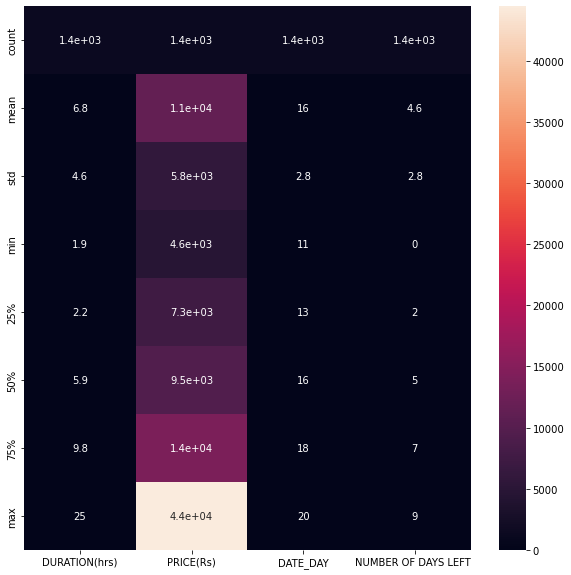

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.describe(),annot=True,annot_kws={'size':10})
plt.show()

<B>DATA DESCRIPTION (CATEGORICAL COLUMNS)

In [25]:
df1.describe(include='O')

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,PATH,STOPS,DATE_WEEK,DATE_MONTH
count,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
unique,10,6,1,1,108,114,23,3,7,1
top,"Thu, 12 Jan",Vistara,New Delhi,Mumbai,20:00,23:20,"['DEL', 'BOM']",1 stop,Thu,Jan
freq,146,473,1383,1383,59,53,477,879,285,1383


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  1383 non-null   object 
 1   AIRLINES              1383 non-null   object 
 2   FROM                  1383 non-null   object 
 3   DESTINATION           1383 non-null   object 
 4   DEPARTURE             1383 non-null   object 
 5   ARRIVAL               1383 non-null   object 
 6   DURATION(hrs)         1383 non-null   float64
 7   PATH                  1383 non-null   object 
 8   STOPS                 1383 non-null   object 
 9   PRICE(Rs)             1383 non-null   float64
 10  DATE_WEEK             1383 non-null   object 
 11  DATE_MONTH            1383 non-null   object 
 12  DATE_DAY              1383 non-null   int32  
 13  NUMBER OF DAYS LEFT   1383 non-null   int32  
dtypes: float64(2), int32(2), object(10)
memory usage: 140.6+ KB


In [27]:
df_cat=df1.select_dtypes(include=['object'])

In [28]:
df_cont=df1.select_dtypes(include=['float64','int32'])

In [29]:
df_cont

,DURATION(hrs),PRICE(Rs),DATE_DAY,NUMBER OF DAYS LEFT
0,14.33,4581.0,11,0
1,2.08,5799.0,11,0
2,2.08,5799.0,11,0
3,2.33,5899.0,11,0
4,2.25,5955.0,11,0
...,...,...,...,...
1378,5.92,21810.0,20,9
1379,2.08,21913.0,20,9
1380,13.67,22125.0,20,9
1381,8.33,25485.0,20,9


In [30]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 20)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 20)

CHECKING FOR CORREALTION AMONG THE FEATURES!!
----------------

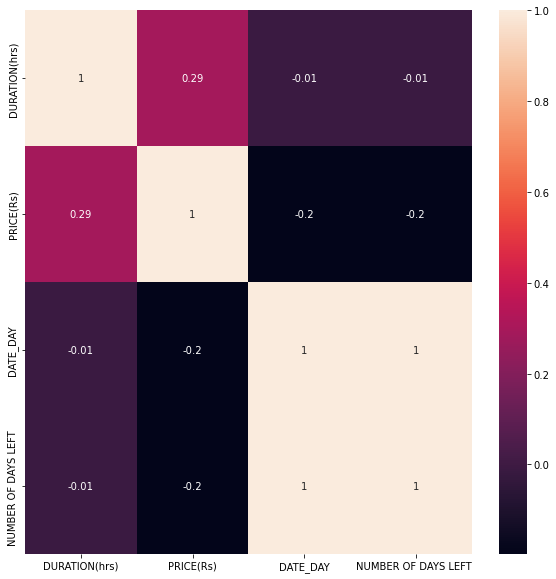

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True,annot_kws={'size':10})
plt.show()

DURATION HAVE THE HIGHEST CORRELATION WITH THE PRICE(Rs)!!<br>
DAY AND NUMBER OF DAYS LEFT FROM BOOKING ALSO HOLDS SIGNIFICANT AMOUNT OF NEGATIVE  CORRELATION WTH THE LABEL PRICE!!<BR>

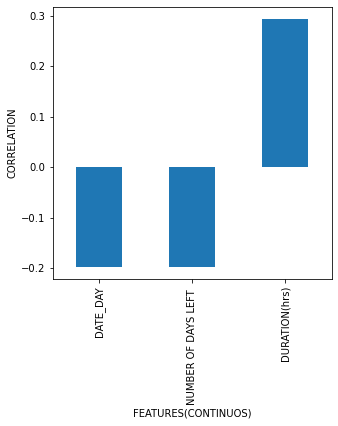

In [32]:
plt.figure(figsize=(5,5))
df1.corr()['PRICE(Rs)'].sort_values().drop(['PRICE(Rs)']).plot(kind='bar')
plt.xlabel("FEATURES(CONTINUOS)")
plt.ylabel("CORRELATION")
plt.show()

<B> CATEGORICAL DATA EXPLORATION!! 

In [33]:
lis=df_cat.columns.to_list()

In [34]:
feat=[]
unique=[]
total_unique=[]

In [35]:
for i in lis:
    feat.append(i)
    unique.append(df1[i].unique())
    total_unique.append(len(df1[i].unique()))

In [36]:
dat=pd.DataFrame({"FEATURES":feat,"UNIQUE FEATURES":unique,"TOTAL UNIQUE FEATURES":total_unique})

In [37]:
dat

,FEATURES,UNIQUE FEATURES,TOTAL UNIQUE FEATURES
0,DATE,"[Wed, 11 Jan, Thu, 12 Jan, Fri, 13 Jan, Sat, 1...",10
1,AIRLINES,"[SpiceJet, IndiGo, Air India, AirAsia, Vistara...",6
2,FROM,[New Delhi],1
3,DESTINATION,[Mumbai],1
4,DEPARTURE,"[20:10, 18:50, 20:00, 23:00, 22:30, 19:40, 12:...",108
5,ARRIVAL,"[10:30, 20:55, 22:05, 01:20, 00:45, 02:20, 06:...",114
6,PATH,"[['DEL', 'JAI', 'BOM'], ['DEL', 'BOM'], ['DEL'...",23
7,STOPS,"[1 stop, Non stop, 1+ stops]",3
8,DATE_WEEK,"[Wed, Thu, Fri, Sat, Sun, Mon, Tue]",7
9,DATE_MONTH,[Jan],1


ANALYSIS!!
-----------

In [38]:
from scipy.stats import norm
from scipy import stats


 mu=11342.67 and sigma=5801.51 



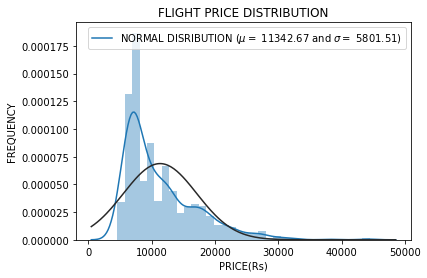

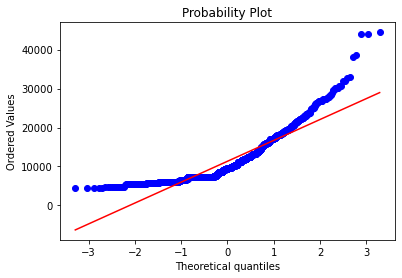

In [39]:
sns.distplot(df1['PRICE(Rs)'],fit=norm)
(mu,sigma)=norm.fit(df1['PRICE(Rs)'])
print('\n mu={:.2f} and sigma={:.2f} \n'.format(mu,sigma))
plt.legend(['NORMAL DISRIBUTION ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],loc='best')
plt.ylabel("FREQUENCY")
plt.title("FLIGHT PRICE DISTRIBUTION")
fig=plt.figure()
res=stats.probplot(df1['PRICE(Rs)'],plot=plt)
plt.show()

THE TARGET VARIABLE "PRICE(Rs)" is skewed to the right and also shows some peakedness(kurtosis).<br>
Also its clear from the Quantile-Quantile plot that the distribution is not normal <br>
We have to use some kind of transformation to bring it to normal.

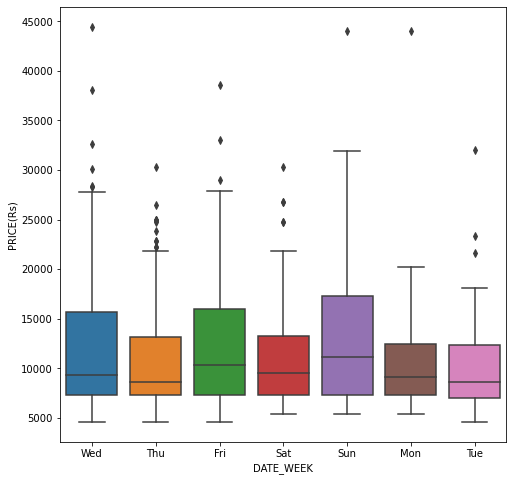

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df1['DATE_WEEK'],y=df1['PRICE(Rs)'])
plt.savefig("f-1.jpg")
plt.show()

CONSIDERABLE AMOUNT OF OUTLIERS CAN BE SEEN OVER THE WEEK 

<B>CHECKING THE MEAN PRICING WITH THE AIRLINES!!<BR>

In [41]:
fga=df1.groupby(['AIRLINES']).mean().reset_index().sort_values(by='PRICE(Rs)',ascending=False)

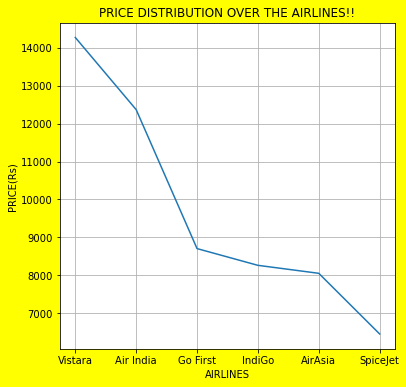

In [42]:
plt.figure(figsize=(6,6),facecolor='Yellow')
plt.grid(True)
sns.lineplot(x=fga['AIRLINES'],y=fga['PRICE(Rs)'])
plt.title("PRICE DISTRIBUTION OVER THE AIRLINES!!")
plt.savefig("f-2.jpg")
plt.show()

VISTARA GOT THE COSTLIEST FLIGHTS FROM NEW DELHI TO MUMBAI!!<BR>
SPICEJET HAVE THE CHEAPEST!!<BR>


<B> ANALYSING THE AVERAGE DISTRIBUTION OF FLIGHT OVER THE AIRLINES!

In [43]:
fga=df1.groupby(['AIRLINES']).mean().reset_index().sort_values(by='DURATION(hrs)',ascending=True)

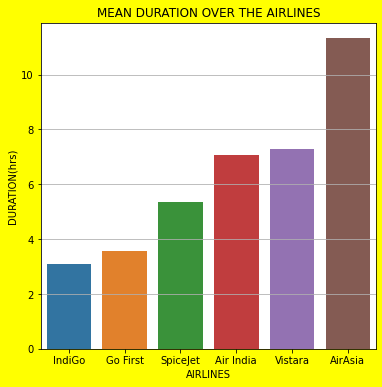

In [44]:
plt.figure(figsize=(6,6),facecolor='Yellow')
plt.grid(True)
sns.barplot(x=fga['AIRLINES'],y=fga['DURATION(hrs)'])
plt.title("MEAN DURATION OVER THE AIRLINES")
plt.savefig("f-3.jpg")
plt.show()

WHEN IT COMES TO DURATION THE MEAN DURATION IN HOURS IS LOWEST FOR INDIGO DEPICTING MOST NON-STOP FLIGHTS FOR INDIGO<BR>
Airasia got the most connecting fligts as the mean duration is the highest for AirAsia!!<br>


<B>WHICH AIRLINE GOT THE MOST FLIGHTS FOR THIS ROUTE OVER THE WEEK!!<BR>

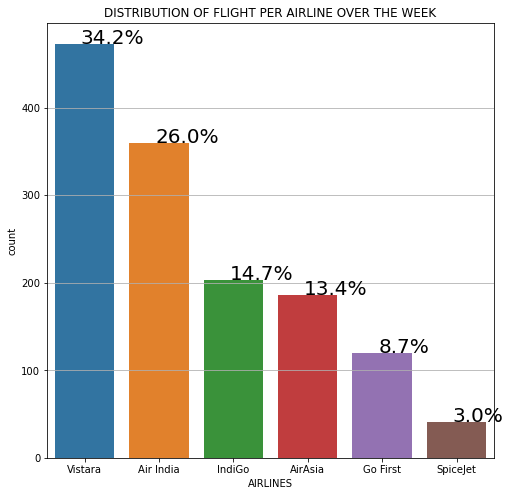

In [45]:
plt.figure(figsize=(8,8))
plt.grid(True)
ax=sns.countplot(x=df1['AIRLINES'],order=df1['AIRLINES'].value_counts().index)
plt.title("DISTRIBUTION OF FLIGHT PER AIRLINE OVER THE WEEK")
without_hue(ax,df1['AIRLINES'])
plt.show()

Vistara got the most flights on this route!!<br>
AirIndia and Indigo falls second and third on the list!!<br>
SpiceJet got 3.0% flight in the market over this route!!<br>

<B> CHECKING THE NUMBER OF STOPS OVER THE FLIGHTS!!

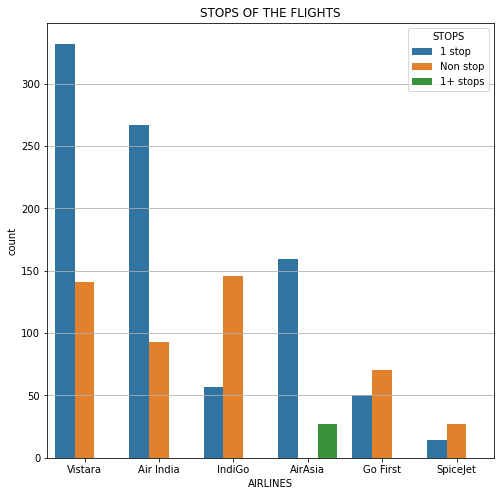

In [46]:
plt.figure(figsize=(8,8))
plt.grid(True)
ax=sns.countplot(x=df1['AIRLINES'],order=df1['AIRLINES'].value_counts().index,hue=df1['STOPS'])
plt.title("STOPS OF THE FLIGHTS")
plt.show()

INDIGO GOT THE MAXIMUM NUMBER OF NUMBER OF NON-STOP FLIGHTS OVER THE ROUTE!!<BR>
VISTARA HAVE THE MAXIMUM NUMBER OF FLIGHTS WITH SINGLE STOP!!<BR>
AirAsia have flights with the most stops 

In [47]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),PATH,STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY,NUMBER OF DAYS LEFT
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11,0
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11,0
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11,0


<B> CHECKING THE PRICE OVER THE WEEK!!

In [48]:
fga=df1.groupby(['DATE_WEEK']).mean().reset_index().sort_values(by='PRICE(Rs)',ascending=False)

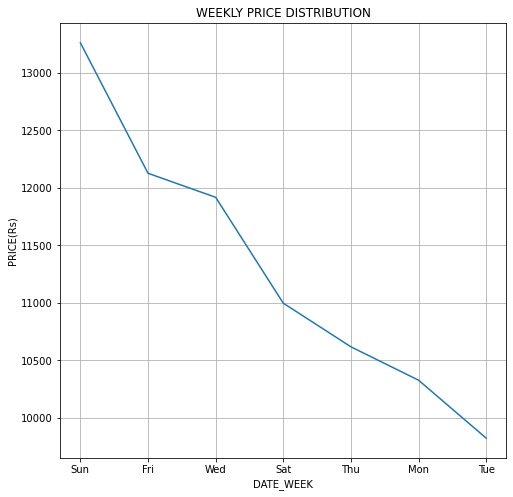

In [49]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.lineplot(x=fga['DATE_WEEK'],y=fga['PRICE(Rs)'])
plt.title("WEEKLY PRICE DISTRIBUTION")
plt.savefig("f-4.jpg")
plt.show()

SUNDAY AND FRIDAY HAVE THE HIGHEST PRICING OVER THE WEEK AND ITS QUIET OBVIOUS BECAUSE MOST PEOPLE TRAVEL OVER THE WEEKEND MAKING THE SURGE IN THE PRICE<br>
WEEK STARTING  DAYS LIKE MONDAY,TUESDAY HAVE THE LEAST PRICE AMONG ALL!!<BR>


<B>HOW THE PRICE VARIES OVER DIFFERENNT TIMIMGS ON 11TH JAN 2023

In [50]:
temp=df1[df1['DATE']=='Wed, 11 Jan'].groupby(by='DEPARTURE').mean().reset_index().sort_values(by='PRICE(Rs)',ascending=False)

In [51]:
temp

,DEPARTURE,DURATION(hrs),PRICE(Rs),DATE_DAY,NUMBER OF DAYS LEFT
60,21:50,14.58,41241.0,11.0,0.0
32,16:35,2.50,27344.0,11.0,0.0
25,15:30,2.08,27344.0,11.0,0.0
39,17:45,2.17,27344.0,11.0,0.0
17,13:45,8.25,26877.0,11.0,0.0
...,...,...,...,...,...
11,12:50,2.17,6375.0,11.0,0.0
47,19:40,2.42,5955.0,11.0,0.0
62,22:30,2.25,5955.0,11.0,0.0
63,23:00,2.33,5899.0,11.0,0.0


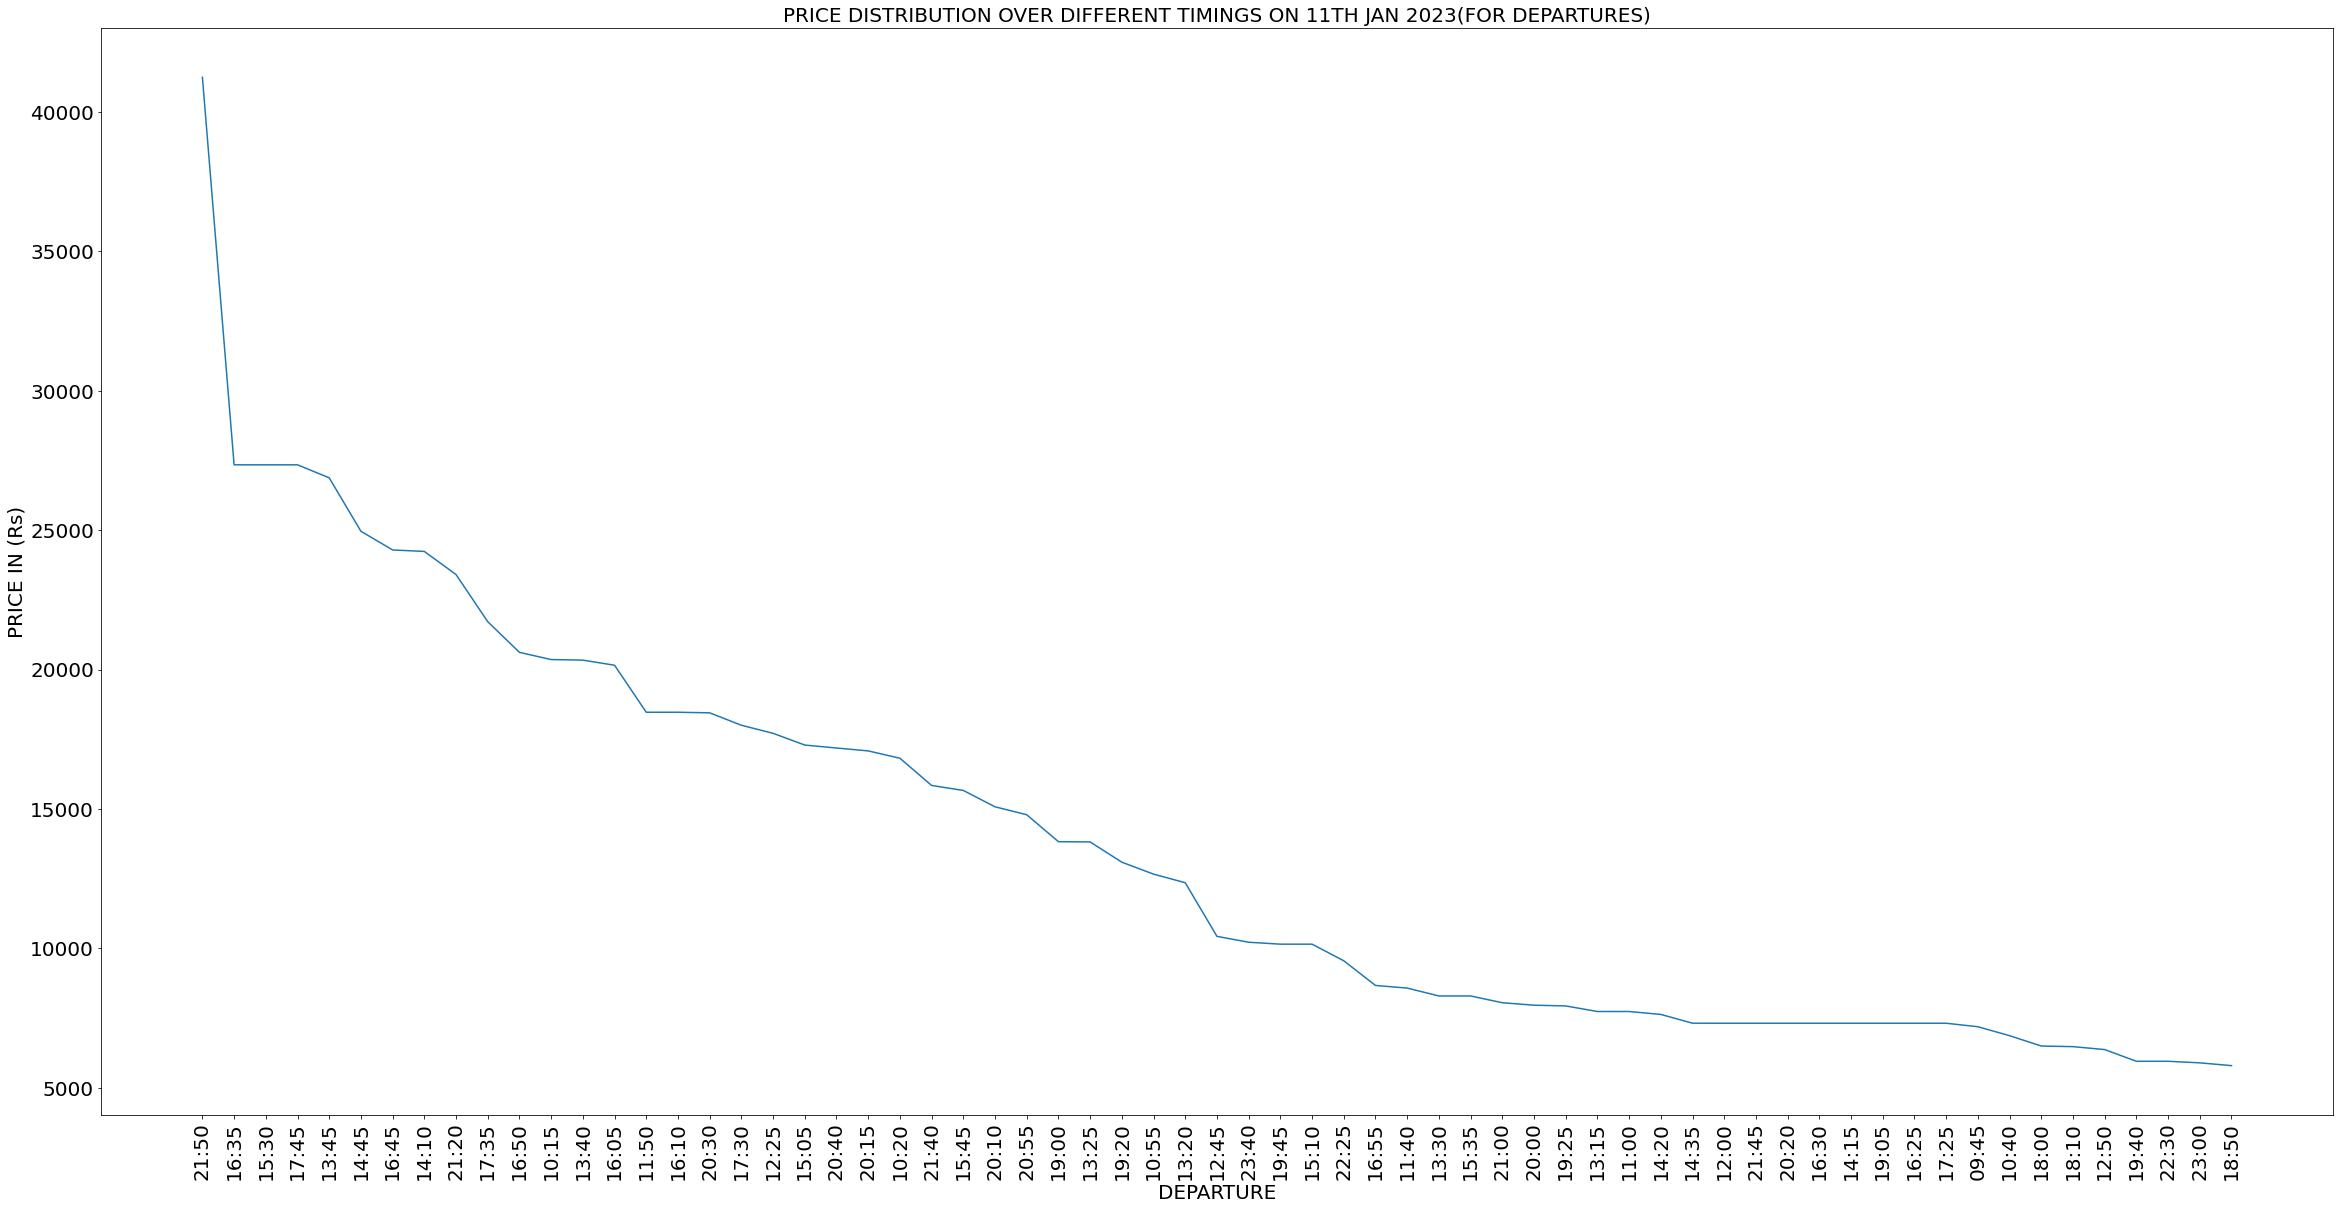

In [52]:
plt.figure(figsize=(40,20))
sns.lineplot(x=temp['DEPARTURE'],y=temp['PRICE(Rs)'])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("PRICE IN (Rs)",size=20)
plt.xlabel("DEPARTURE",size=20)
plt.title("PRICE DISTRIBUTION OVER DIFFERENT TIMINGS ON 11TH JAN 2023(FOR DEPARTURES)",size=20)
plt.savefig("f-5.jpg")
plt.show()

<B>HOW THE PRICE VARIES OVER DIFFERENNT TIMIMGS OVER ENTIRE WEEK!!

In [53]:
tet=df1.groupby(['DEPARTURE']).mean().reset_index().sort_values(by='PRICE(Rs)',ascending=True)

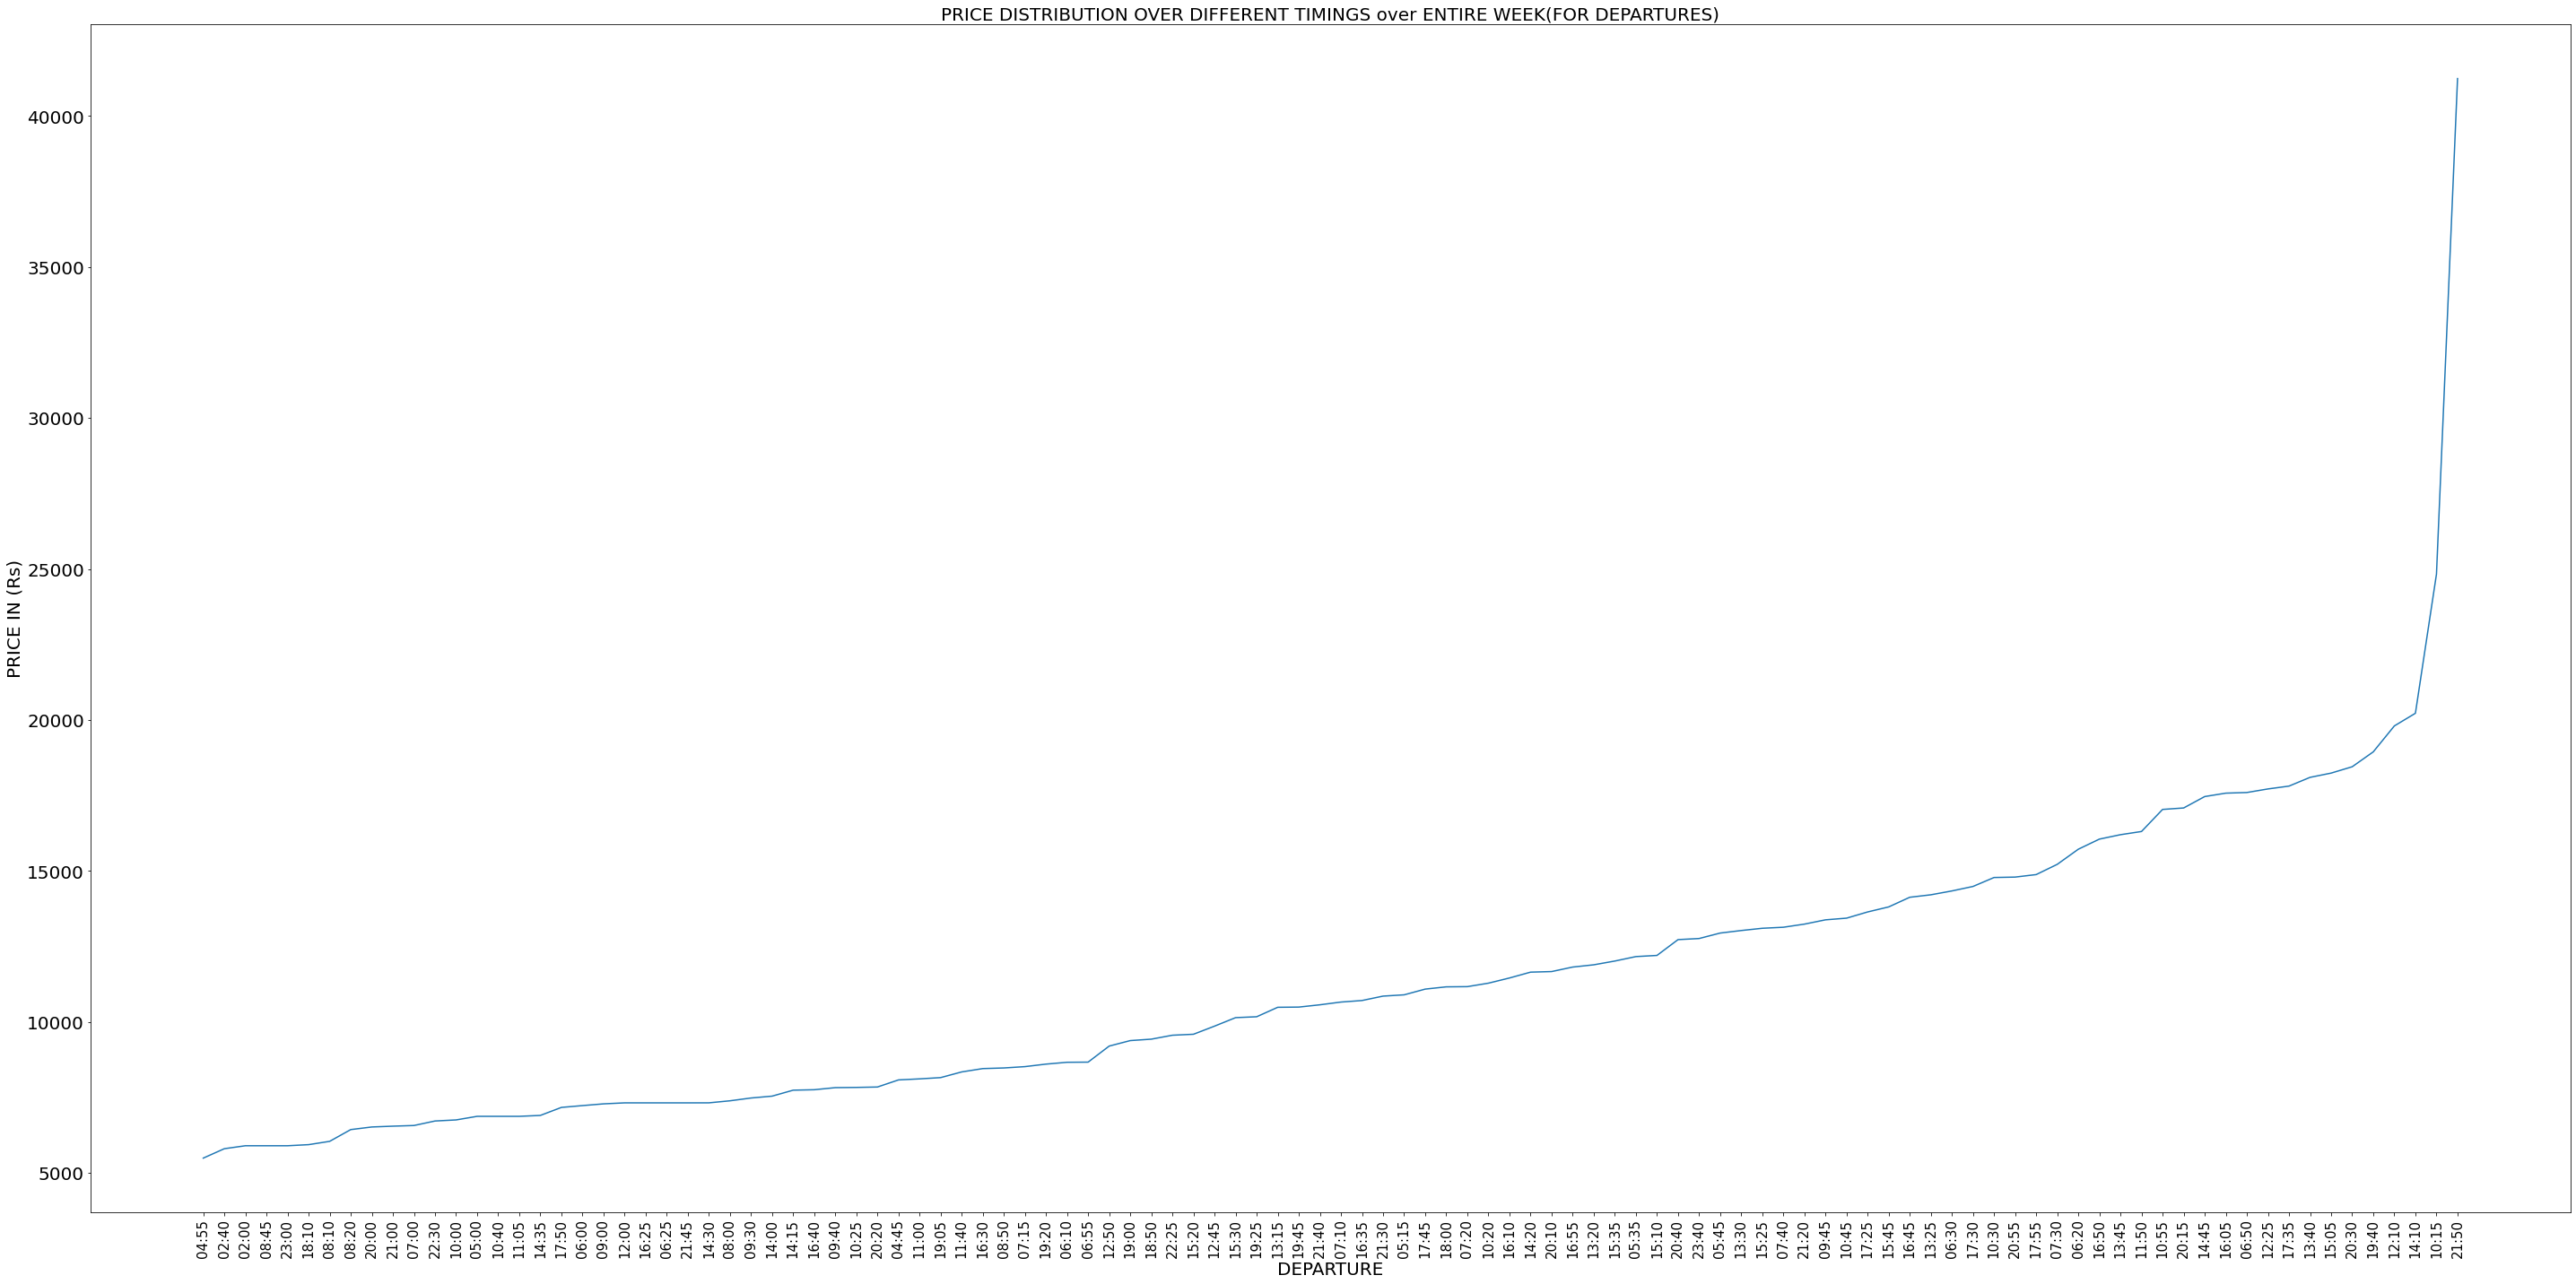

In [55]:
plt.figure(figsize=(40,20))
sns.lineplot(x=tet['DEPARTURE'],y=tet['PRICE(Rs)'])
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=20)
plt.ylabel("PRICE IN (Rs)",size=20)
plt.xlabel("DEPARTURE",size=20)
plt.title("PRICE DISTRIBUTION OVER DIFFERENT TIMINGS over ENTIRE WEEK(FOR DEPARTURES)",size=20)
plt.tight_layout()
plt.savefig("f-6.jpg")
plt.show()

EARLY MORNING FLIGHTS I.E AROUND 2 AND 4 AM  ARE THE CHEAPEST AMONG ALL!!<BR>
POST DINNER TIMINGS AROUND 9,10 PM ARE THE COSTLIEST AS MOST PEOPLE PREFER TRAVELLING TO THESE TIMIMGS!!

<B> HOW PRICES VARY AS THE NUMBER OF DAYS FROM TODAY INCREASES FOR BOOKING

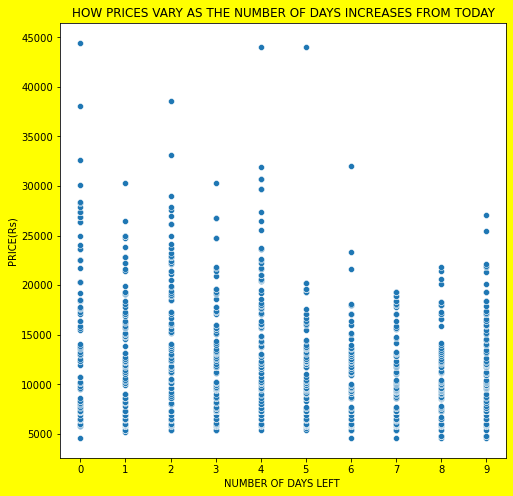

In [56]:
plt.figure(figsize=(8,8),facecolor='Yellow')
sns.scatterplot(x=df1['NUMBER OF DAYS LEFT '],y=df1['PRICE(Rs)'])
plt.xticks(np.arange(0,10))
plt.title("HOW PRICES VARY AS THE NUMBER OF DAYS INCREASES FROM TODAY")
plt.savefig("f-7.jpg")
plt.show()

A CLEAR DECREASING TREND CAN BE SEEN AS NUMBER OF DAYS INCREASES FROM TODAY!!<BR>
LOWEST PRICES CAN BE SEEN ON THE 7TH DAY WITH PRICES REACHING 20000 TO THE Max!<br>


<B> ANALYSING THE MEAN DURATION OF FLIGHTS OVER THE WEEK!!

In [485]:
sd=df1.groupby(['DATE_WEEK']).mean().sort_values(by=['DURATION(hrs)'],ascending=False).reset_index()

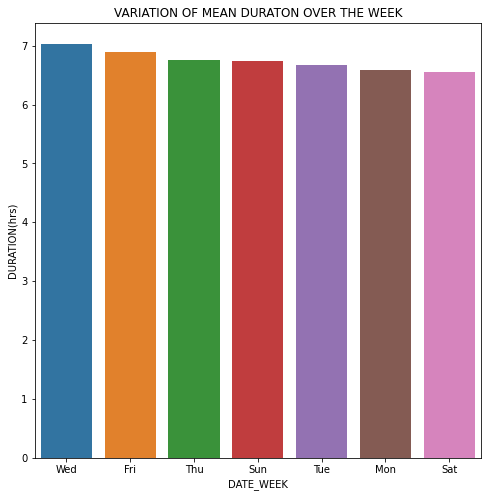

In [486]:
plt.figure(figsize=(8,8))
sns.barplot(x=sd['DATE_WEEK'],y=sd['DURATION(hrs)'])
plt.title("VARIATION OF MEAN DURATON OVER THE WEEK")
plt.show()

A TREND SHOWING VARIATION OF MEAN DURATION OVER THE WEEK!!

<B>HOW PRICE VARIES OVER DIFFERENT PATHS!!

In [58]:
dp=df1.groupby(['PATH']).mean().sort_values(by=['PRICE(Rs)'],ascending=False).reset_index()

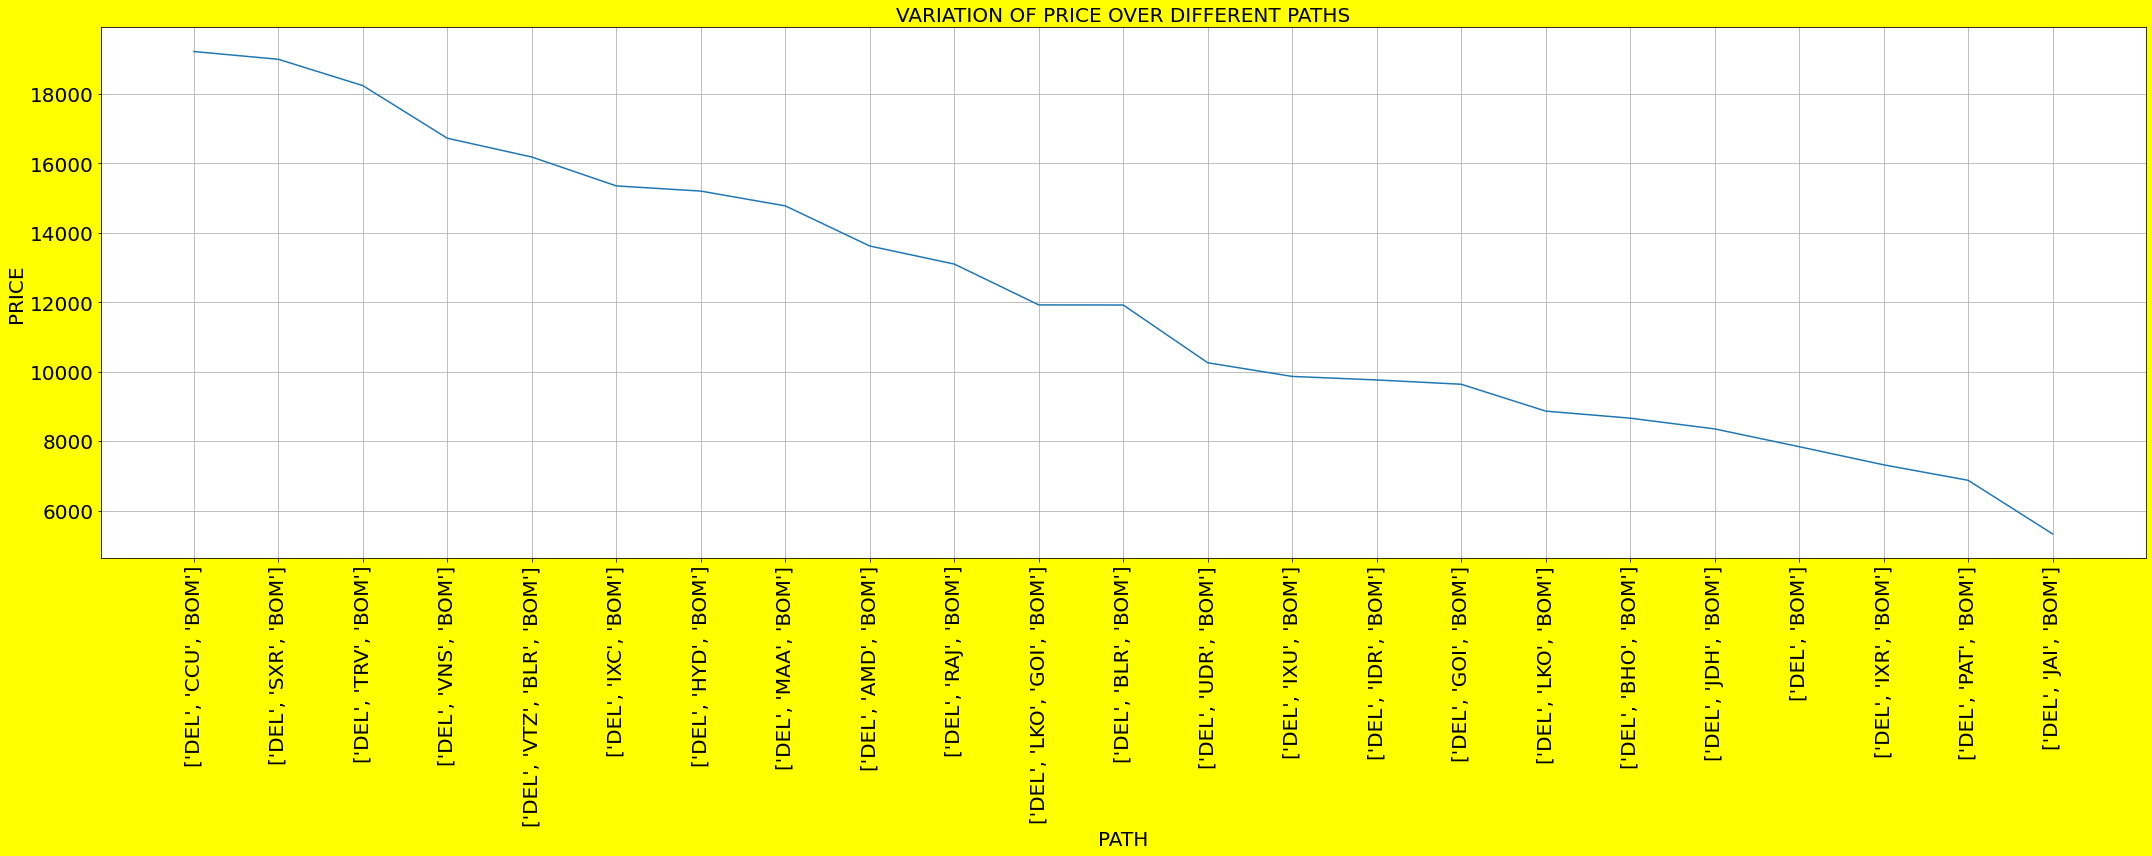

In [60]:
plt.figure(figsize=(30,12),facecolor='Yellow')
plt.grid(True)
sns.lineplot(x=dp['PATH'],y=dp['PRICE(Rs)'])
plt.title("VARIATION OF PRICE OVER DIFFERENT PATHS",size=20)
plt.xticks(rotation=90,fontsize=20)
plt.xlabel("PATH",size=20)
plt.ylabel("PRICE",size=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("f-8.jpg")
plt.show()

ROUTE [DELHI-JAIPUR-BOMBAY] IS THE CHEAPEST AMONG ALL WITH A SINGLE STOP IN JAIPUR!!<BR>
PATHS [DEL-IXR-BOMB],[DEL-PAT-BOM],[DEL-JAI-BOM] are the paths having 1 stop and the mean price is less than the price over the direct route!<br>

<B>HOW THE MEAN  DURATION VARIES OVER DIFFERENT PATHS!!<BR>


In [489]:
dp=df1.groupby(['PATH']).mean().sort_values(by=['DURATION(hrs)'],ascending=False).reset_index()

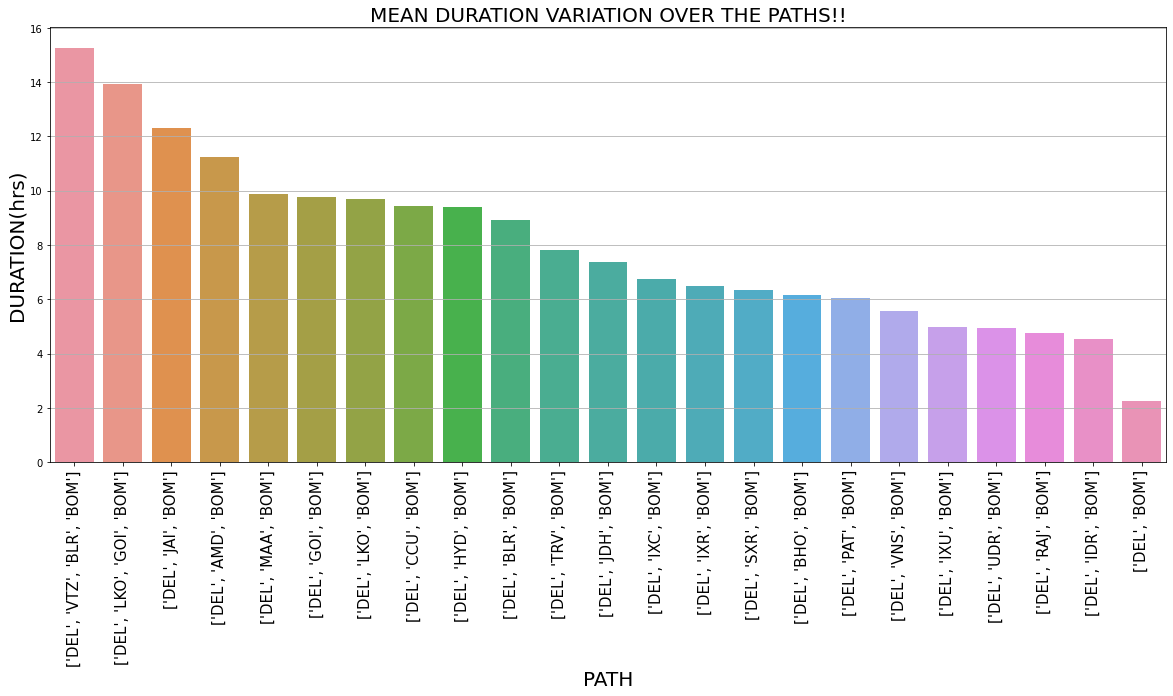

In [490]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.barplot(x=dp['PATH'],y=dp['DURATION(hrs)'])
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("PATH",size=20)
plt.ylabel("DURATION(hrs)",size=20)
plt.title("MEAN DURATION VARIATION OVER THE PATHS!!",size=20)
plt.show()

AS THE NUMBER OF STOPS INCREASES THE DURATION IS SEEN INCREASING!!<BR>
PATH WITH A STOP IN INDORE HAVE THE LOWEST MEAN DURATION OVER THE PATHS!!


<b> HOW THE PRICE VARIES WITH THE DURATION!!

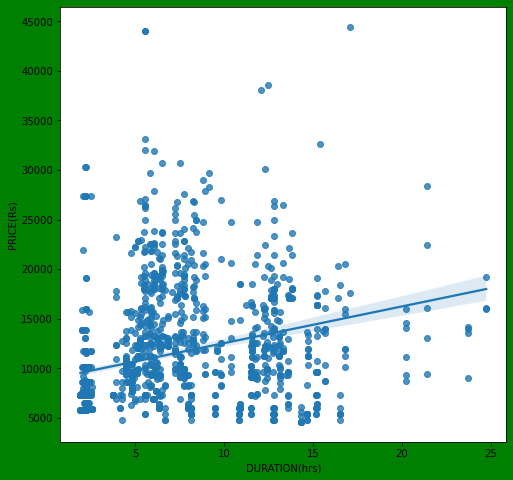

In [61]:
plt.figure(figsize=(8,8),facecolor='Green')
sns.regplot(x=df1['DURATION(hrs)'],y=df1['PRICE(Rs)'])
plt.savefig("f-9.jpg")
plt.show()

<B> COUNT OF FLIGHTS WITH DIFFERENT STOPS!!<BR>

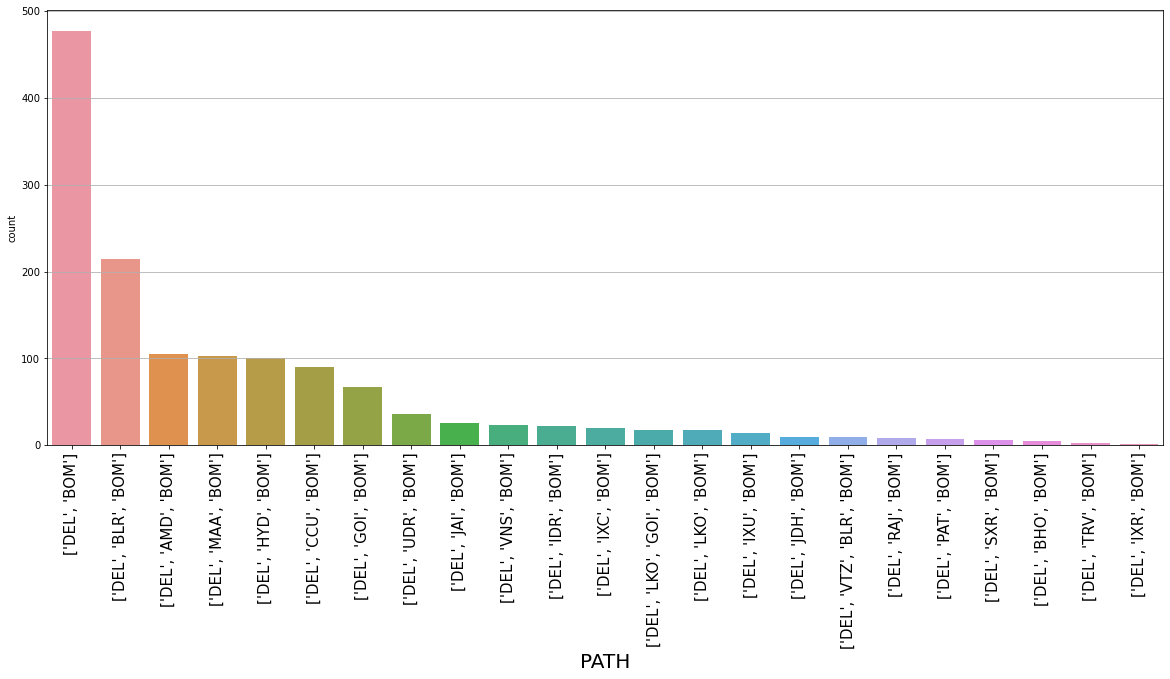

In [492]:
plt.figure(figsize=(20,8))
plt.grid(True)
sns.countplot(x=df1['PATH'],order=df1['PATH'].value_counts().index)
plt.xlabel("PATH",size=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

AFTER DEL-BOM DIRECT FLIGHTS WE HAVE MOST COUNTS OF DEL-BLR-BOM 

<B> DIFFERENT COUNTS OF FLIGHTS AT DIFFERENT TIMINGS!!

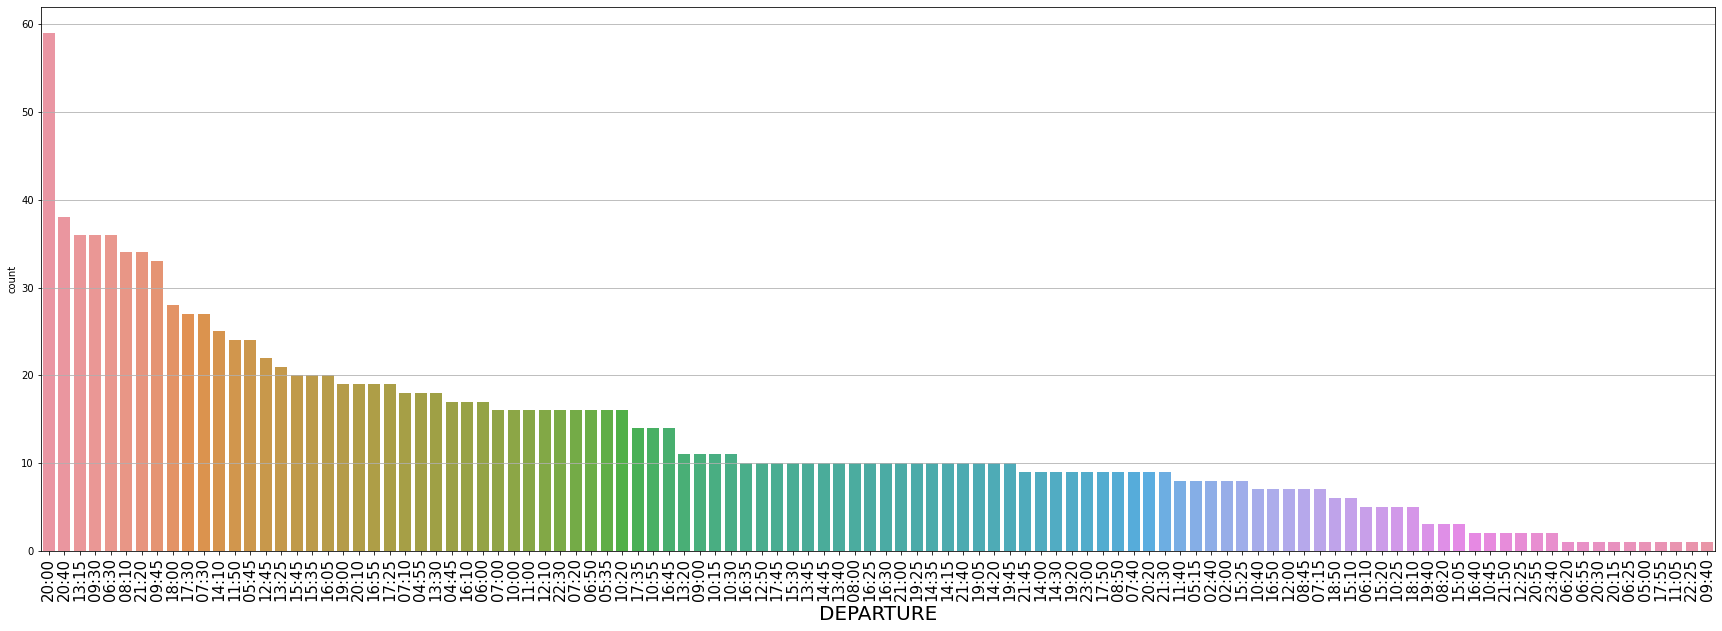

In [493]:
plt.figure(figsize=(30,10))
plt.grid(True)
sns.countplot(x=df1['DEPARTURE'],order=df1['DEPARTURE'].value_counts().index)
plt.xlabel("DEPARTURE",size=20)
plt.xticks(rotation=90,fontsize=15)
plt.show()

8PM FLIGHTS HAVE THE MAXIMUM COUNT ACROSS THE WEEK!!<BR>


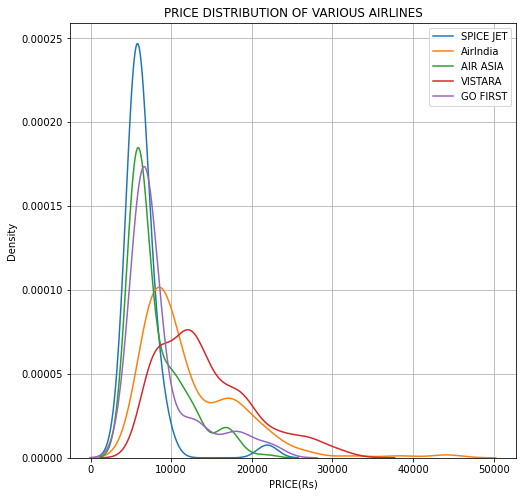

In [494]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(df1.loc[df1['AIRLINES']=='SpiceJet','PRICE(Rs)'],label='SPICE JET')
sns.kdeplot(df1.loc[df1['AIRLINES']=='Indigo','PRICE(Rs)'],label='INDIGO')
sns.kdeplot(df1.loc[df1['AIRLINES']=='Air India','PRICE(Rs)'],label='AirIndia')
sns.kdeplot(df1.loc[df1['AIRLINES']=='AirAsia','PRICE(Rs)'],label="AIR ASIA")
sns.kdeplot(df1.loc[df1['AIRLINES']=='Vistara','PRICE(Rs)'],label="VISTARA")
sns.kdeplot(df1.loc[df1['AIRLINES']=='Go First','PRICE(Rs)'],label='GO FIRST')
plt.title("PRICE DISTRIBUTION OF VARIOUS AIRLINES")
plt.legend()
plt.show()

<B> DURATION DISTRIBUTION OF DIFFERENT AIRLINES!

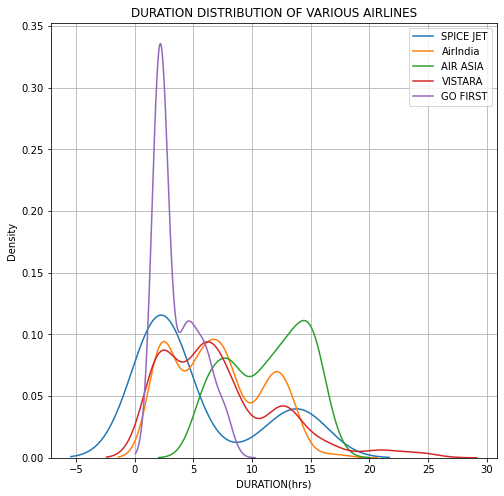

In [495]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(df1.loc[df1['AIRLINES']=='SpiceJet','DURATION(hrs)'],label='SPICE JET')
sns.kdeplot(df1.loc[df1['AIRLINES']=='Indigo','DURATION(hrs)'],label='INDIGO')
sns.kdeplot(df1.loc[df1['AIRLINES']=='Air India','DURATION(hrs)'],label='AirIndia')
sns.kdeplot(df1.loc[df1['AIRLINES']=='AirAsia','DURATION(hrs)'],label="AIR ASIA")
sns.kdeplot(df1.loc[df1['AIRLINES']=='Vistara','DURATION(hrs)'],label="VISTARA")
sns.kdeplot(df1.loc[df1['AIRLINES']=='Go First','DURATION(hrs)'],label='GO FIRST')
plt.title("DURATION DISTRIBUTION OF VARIOUS AIRLINES")
plt.legend()
plt.show()

<B> DISTRIBUTION OF PRICE WITH DIFFERENT STOPS 

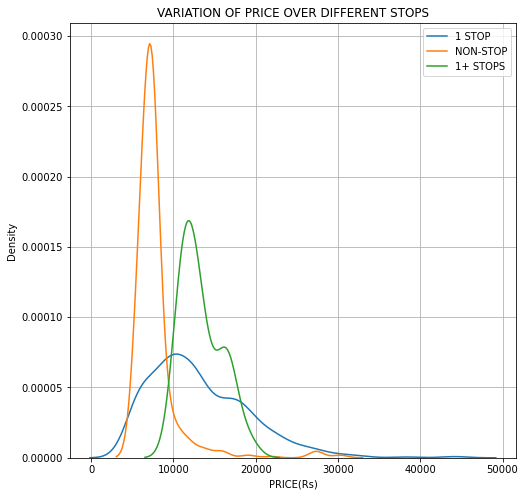

In [496]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.kdeplot(df1.loc[df1['STOPS']=='1 stop','PRICE(Rs)'],label='1 STOP')
sns.kdeplot(df1.loc[df1['STOPS']=='Non stop','PRICE(Rs)'],label='NON-STOP')
sns.kdeplot(df1.loc[df1['STOPS']=='1+ stops','PRICE(Rs)'],label='1+ STOPS')
plt.title("VARIATION OF PRICE OVER DIFFERENT STOPS")
plt.legend()
plt.show()

FLIGHT PRICE DISTRIBUTION CAN BE SEEN OVER DIFFERENT STOPS!!<BR>

<B> DISTRIBUTION PLOT FOR DURATION(hrs)


 Mean is 6.78 and standard distribution is 4.59


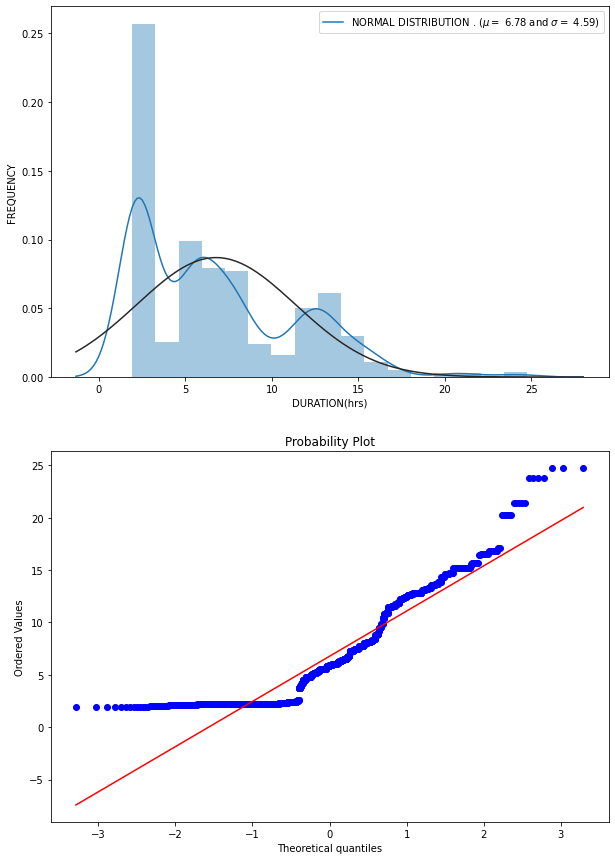

In [497]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.distplot(df1['DURATION(hrs)'],fit=norm)
(mu,sigma)=norm.fit(df1['DURATION(hrs)'])
print(f"\n Mean is {round(mu,2)} and standard distribution is {round(sigma,2)}")
plt.legend(['NORMAL DISTRIBUTION . ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)])
plt.ylabel("FREQUENCY")
plt.subplot(2,1,2)
stats.probplot(df1['DURATION(hrs)'],plot=plt)
plt.show()

A LITTLE SKEWNESS TO THE RIGHT CAN BE SEEN FROM THE PLOT!!<BR>
Q-Q LOT CONFIRMS THE DEVIATION FROM THE NORMAL DISTRIBUTION!!

In [498]:
dg=pd.crosstab(df1['AIRLINES'],[df1['STOPS']]).reset_index()

In [499]:
dg.sort_values(by='1 stop',ascending=False,inplace=True)

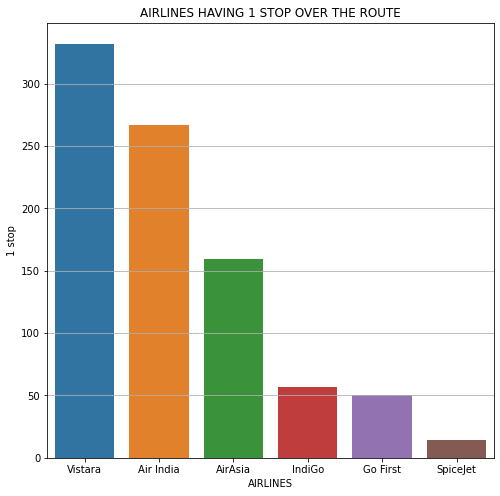

In [500]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.barplot(x=dg['AIRLINES'],y=dg['1 stop'])
plt.title("AIRLINES HAVING 1 STOP OVER THE ROUTE")
plt.show()

VISTARA CAN BE SEEN HAVING THE MAXIMUM 1 STOP FLIGHTS OVER THE ROUTE!!<BR>
AIR INDIA AND AIR-ASIA CAN BE SEEN HAVING THE 2ND AND 3RD POSITION IN THE LIST!!<BR>


In [501]:
dg.sort_values(by='Non stop',ascending=False,inplace=True)

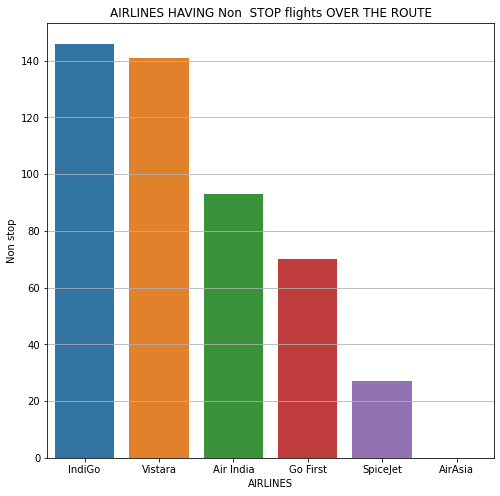

In [502]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.barplot(x=dg['AIRLINES'],y=dg['Non stop'])
plt.title("AIRLINES HAVING Non  STOP flights OVER THE ROUTE")
plt.show()

INDIGO CAN BE SEEN HAVING MAXIMUM NON STOPS FLIGHTS OVER THE ROUTE WITH A COUNT REACHING 130 DIRECT FLIGHTS!!<BR>
AIR ASIA HAVE ZERO NON STOP FLIGHTS OVER THE ROUTE!!<BR>

In [503]:
dg.sort_values(by='1+ stops',ascending=False,inplace=True)

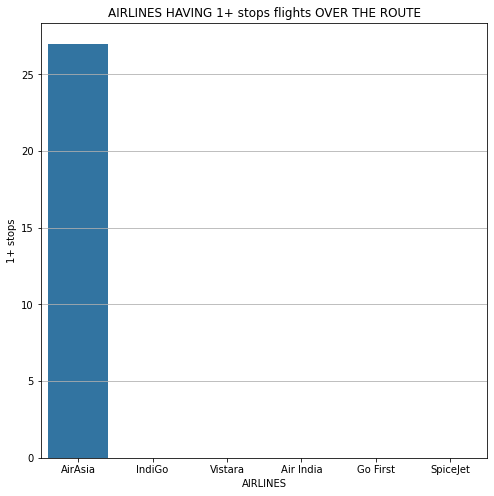

In [504]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.barplot(x=dg['AIRLINES'],y=dg['1+ stops'])
plt.title("AIRLINES HAVING 1+ stops flights OVER THE ROUTE")
plt.show()

Air asia have either 1+ stops flights or 1 stop flight over the route!!<br>
None of the other airlines can be seen having 1 stops flights over the route!!<br>

In [505]:
dt=pd.crosstab(df1['AIRLINES'],[df1['DATE_WEEK']]).reset_index()

In [506]:
dt.sort_values(by='Fri',ascending=False,inplace=True)

In [507]:
dt

DATE_WEEK,AIRLINES,Fri,Mon,Sat,Sun,Thu,Tue,Wed
5,Vistara,94,51,48,47,93,49,91
0,Air India,74,34,37,36,75,36,68
1,AirAsia,40,20,20,19,40,20,27
3,IndiGo,31,22,22,21,48,23,36
2,Go First,25,14,14,13,21,13,20
4,SpiceJet,7,4,5,4,8,5,8


<B> FREQUENCY  OF DIFFERENT AIRLINES OVER DIFFERENT DAYS OF THE WEEK!!

<B>LETS CHECK FIRST FOR THE WEEKEND I.E FRIDAY,SATURDAY,SUNDAY!!

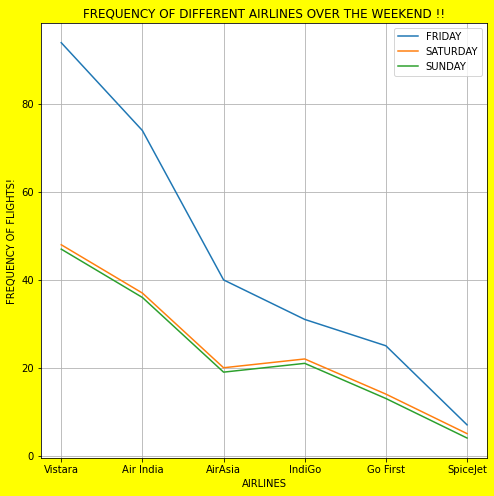

In [508]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
ax=sns.lineplot(x=dt['AIRLINES'],y=dt['Fri'],label='FRIDAY')
dt.sort_values(by='Sat',ascending=False,inplace=True)
sns.lineplot(x=dt['AIRLINES'],y=dt['Sat'],label='SATURDAY',ax=ax)
dt.sort_values(by='Sun',ascending=False,inplace=True)
sns.lineplot(x=dt['AIRLINES'],y=dt['Sun'],label='SUNDAY',ax=ax)
plt.title("FREQUENCY OF DIFFERENT AIRLINES OVER THE WEEKEND !!")
plt.ylabel("FREQUENCY OF FLIGHTS!")
plt.show()

VISTARA HAVE THE HIGHEST NUMBER OF FLIGHTS OVER THE WEEKEND !!<BR>
AIR-INDIA STANDS SENCOND IN THE LIST<BR>
SPICE-JET HAVE THE LEAST NUMBER OF FLIGHTS OPERATING OVER THIS ROUTE!<BR>

<B>LETS CHECK FREQUENCY OF THE FLIGHTS FOR THE WEEK START I.E MONDAY,TUESDAY!!

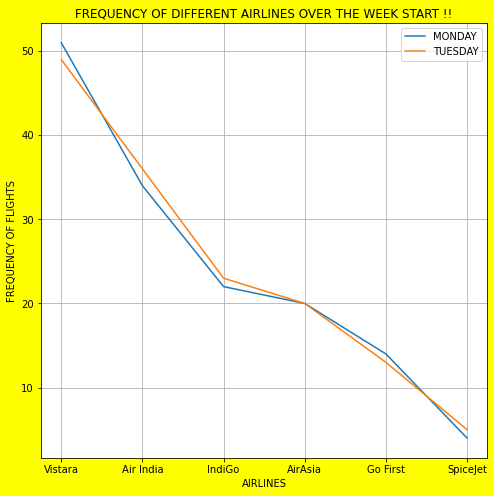

In [509]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
dt.sort_values(by='Mon',ascending=False,inplace=True)
ax=sns.lineplot(x=dt['AIRLINES'],y=dt['Mon'],label='MONDAY')
dt.sort_values(by='Tue',ascending=False,inplace=True)
sns.lineplot(x=dt['AIRLINES'],y=dt['Tue'],label='TUESDAY',ax=ax)
plt.title("FREQUENCY OF DIFFERENT AIRLINES OVER THE WEEK START !!")
plt.ylabel("FREQUENCY OF FLIGHTS")
plt.show()

ABOVE IS THE LINE PLOT DESCRIBING THE VARIATION OVER THE WEEK START!!

<B>FREQUENCY OF THE FLIGHTS FOR THE MID- WEEK  I.E WEDNESAY,THURSADY!!

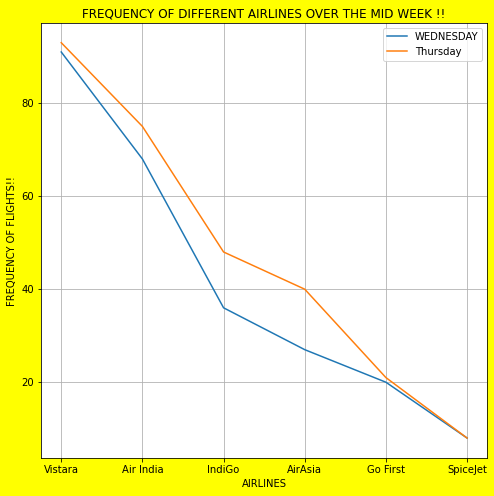

In [510]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
dt.sort_values(by='Wed',ascending=False,inplace=True)
ax=sns.lineplot(x=dt['AIRLINES'],y=dt['Wed'],label='WEDNESDAY')
dt.sort_values(by='Thu',ascending=False,inplace=True)
sns.lineplot(x=dt['AIRLINES'],y=dt['Thu'],label='Thursday',ax=ax)
plt.title("FREQUENCY OF DIFFERENT AIRLINES OVER THE MID WEEK !!")
plt.ylabel("FREQUENCY OF FLIGHTS!!")
plt.show()

In [511]:
dl=pd.crosstab(df1['AIRLINES'],[df1['PATH']]).reset_index()

In [512]:
dl

PATH,AIRLINES,"['DEL', 'AMD', 'BOM']","['DEL', 'BHO', 'BOM']","['DEL', 'BLR', 'BOM']","['DEL', 'BOM']","['DEL', 'CCU', 'BOM']","['DEL', 'GOI', 'BOM']","['DEL', 'HYD', 'BOM']","['DEL', 'IDR', 'BOM']","['DEL', 'IXC', 'BOM']",...,"['DEL', 'LKO', 'BOM']","['DEL', 'LKO', 'GOI', 'BOM']","['DEL', 'MAA', 'BOM']","['DEL', 'PAT', 'BOM']","['DEL', 'RAJ', 'BOM']","['DEL', 'SXR', 'BOM']","['DEL', 'TRV', 'BOM']","['DEL', 'UDR', 'BOM']","['DEL', 'VNS', 'BOM']","['DEL', 'VTZ', 'BLR', 'BOM']"
0,Air India,0,0,71,93,35,11,36,10,0,...,0,0,72,0,0,0,3,10,10,0
1,AirAsia,0,0,72,0,0,50,0,0,0,...,18,18,0,0,0,0,0,0,0,9
2,Go First,28,0,0,70,0,6,0,0,0,...,0,0,0,7,0,6,0,0,3,0
3,IndiGo,6,5,0,146,0,0,0,12,0,...,0,0,0,0,8,0,0,15,0,0
4,SpiceJet,0,0,0,27,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
5,Vistara,71,0,72,141,55,0,65,0,20,...,0,0,31,0,0,0,0,8,10,0


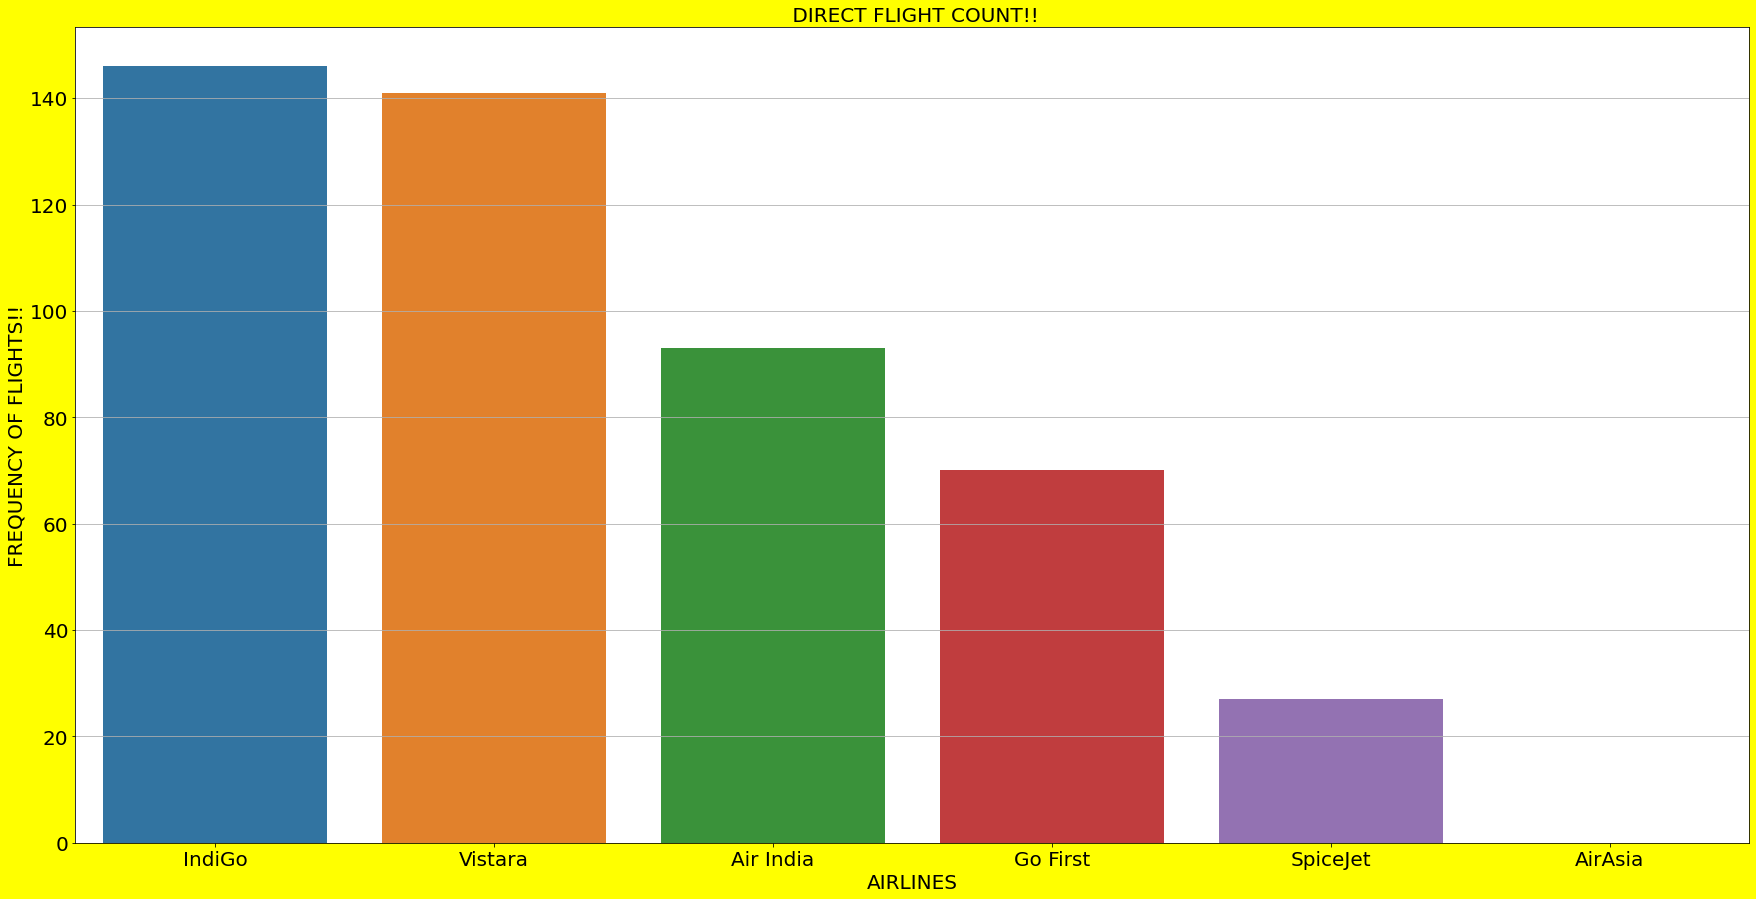

In [513]:
plt.figure(figsize=(30,15),facecolor='Yellow')
plt.grid(True)
dl.sort_values(by="['DEL', 'BOM']",ascending=False,inplace=True)
ax=sns.barplot(x=dl['AIRLINES'],y=dl["['DEL', 'BOM']"],label='DELHI-BOMBAY')
plt.title(" DIRECT FLIGHT COUNT!!",fontsize=20)
plt.ylabel("FREQUENCY OF FLIGHTS!!",size=20)
plt.xlabel("AIRLINES",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

INDIGO HAVE THE MAXIMUM NUMBER OF DIRECT FLIGHTS OVER THE ROUTE!!<BR>

<B>ANALYSIS COMPLETE!!

In [514]:
df1.head()

,DATE,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),PATH,STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY,NUMBER OF DAYS LEFT
0,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:10,10:30,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11,0
1,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,18:50,20:55,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
2,"Wed, 11 Jan",SpiceJet,New Delhi,Mumbai,20:00,22:05,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
3,"Wed, 11 Jan",IndiGo,New Delhi,Mumbai,23:00,01:20,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11,0
4,"Wed, 11 Jan",Air India,New Delhi,Mumbai,22:30,00:45,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11,0


WE CAN DROP DATE COLUMN AS WE HAVE ALREADY SPLITTED THE DATE INTO MONTH,WEEK AND DAY 

In [515]:
df1.drop(['DATE'],axis=1,inplace=True)

ENCODING THE CATEGORICAL COLUMNS IN THE DATASET!!

In [516]:
from datetime import datetime

In [517]:
def chng(t):
    time_object = datetime.strptime(t,'%H:%M').time()
    return time_object
    

In [518]:
df1['DEPARTURE']=df1['DEPARTURE'].apply(chng)

In [519]:
df1['ARRIVAL']=df1['ARRIVAL'].apply(chng)

In [520]:
df1.head()

,AIRLINES,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),PATH,STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY,NUMBER OF DAYS LEFT
0,SpiceJet,New Delhi,Mumbai,20:10:00,10:30:00,14.33,"['DEL', 'JAI', 'BOM']",1 stop,4581.0,Wed,Jan,11,0
1,SpiceJet,New Delhi,Mumbai,18:50:00,20:55:00,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
2,SpiceJet,New Delhi,Mumbai,20:00:00,22:05:00,2.08,"['DEL', 'BOM']",Non stop,5799.0,Wed,Jan,11,0
3,IndiGo,New Delhi,Mumbai,23:00:00,01:20:00,2.33,"['DEL', 'BOM']",Non stop,5899.0,Wed,Jan,11,0
4,Air India,New Delhi,Mumbai,22:30:00,00:45:00,2.25,"['DEL', 'BOM']",Non stop,5955.0,Wed,Jan,11,0


<B>ORDINALLY ENCODING THE DEPARTURE,ARRIVAL,DATE_WEEK,STOPS !

In [521]:
from sklearn.preprocessing import OrdinalEncoder

In [522]:
lip=sorted(df1['DEPARTURE'].unique())

In [523]:
oe=OrdinalEncoder(categories=[lip])

In [524]:
df1['DEPARTURE']=oe.fit_transform(df1['DEPARTURE'].values.reshape(-1,1))

In [525]:
lia=sorted(df1['ARRIVAL'].unique())

In [526]:
oa=OrdinalEncoder(categories=[lia])

In [527]:
df1['ARRIVAL']=oa.fit_transform(df1['ARRIVAL'].values.reshape(-1,1))

In [528]:
df1['DATE_WEEK']=df1['DATE_WEEK'].map({"Mon":0,"Tue":1,"Wed":2,"Thu":3,"Fri":4,"Sat":5,"Sun":6})

In [529]:
df1['STOPS']=df1['STOPS'].map({"Non stop":0,"1 stop":1,"1+ stops":2})

<B> LABEL ENCODING FROM ,DESTNATION,DATE_MONTH!!

In [530]:
ad=['FROM','DESTINATION','DATE_MONTH']

In [531]:
from sklearn.preprocessing import LabelEncoder

In [532]:
le=LabelEncoder()

In [533]:
for i in ad:
    df1[i]=le.fit_transform(df1[i].values.reshape(-1,1))

<B> GETTING DUMMIES FOR AIRLINES

In [534]:
dfa=pd.DataFrame(pd.get_dummies(df1['AIRLINES']))

In [535]:
dfa

,Air India,AirAsia,Go First,IndiGo,SpiceJet,Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1378,1,0,0,0,0,0
1379,0,0,0,0,1,0
1380,1,0,0,0,0,0
1381,1,0,0,0,0,0


In [536]:
df1=pd.concat([df1,dfa],axis=1)

In [537]:
df1.drop(['AIRLINES'],axis=1,inplace=True)

<B> BINARY ENCODING "PATH" AS THERE ARE MANY CATEGORIES AND NOT ADVISED TO HANDLE USING ONEHOTENCODING!!

In [538]:
import category_encoders as ce

In [539]:
ben=ce.BinaryEncoder()

In [540]:
dfe=pd.DataFrame(ben.fit_transform(df1['PATH']))

In [541]:
df1=pd.concat([df1,dfe],axis=1)

In [542]:
df1.drop(['PATH'],axis=1,inplace=True)

In [543]:
df1.head()

,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),STOPS,PRICE(Rs),DATE_WEEK,DATE_MONTH,DATE_DAY,...,AirAsia,Go First,IndiGo,SpiceJet,Vistara,PATH_0,PATH_1,PATH_2,PATH_3,PATH_4
0,0,0,92.0,31.0,14.33,1,4581.0,2,0,11,...,0,0,0,1,0,0,0,0,0,1
1,0,0,84.0,93.0,2.08,0,5799.0,2,0,11,...,0,0,0,1,0,0,0,0,1,0
2,0,0,91.0,100.0,2.08,0,5799.0,2,0,11,...,0,0,0,1,0,0,0,0,1,0
3,0,0,106.0,4.0,2.33,0,5899.0,2,0,11,...,0,0,1,0,0,0,0,0,1,0
4,0,0,105.0,3.0,2.25,0,5955.0,2,0,11,...,0,0,0,0,0,0,0,0,1,0


<B> ALL CATEGORICAL COLUMNS ENCODED SUCCESSFULLY!!

<B> AGAIN CHECKING THE COORELATION WITH THE LABEL(PRICE(Rs))

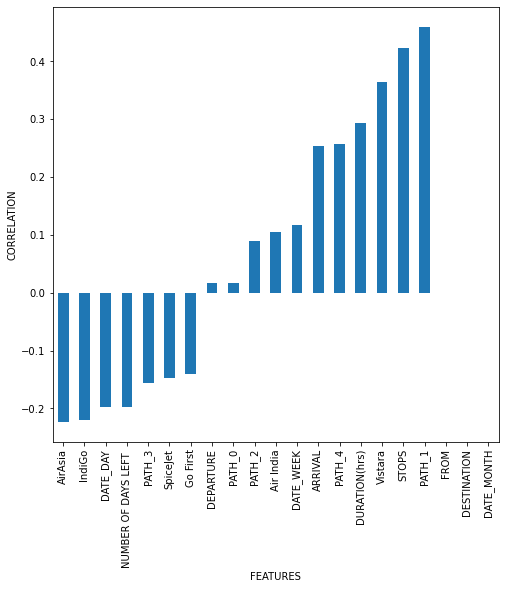

In [544]:
plt.figure(figsize=(8,8))
df1.corr()['PRICE(Rs)'].sort_values().drop(['PRICE(Rs)']).plot(kind='bar')
plt.xlabel("FEATURES")
plt.ylabel("CORRELATION")
plt.show()

<B> HEATMAP DESCRIBING THE CORREALTION AMONG THE FEATURES!!<BR>

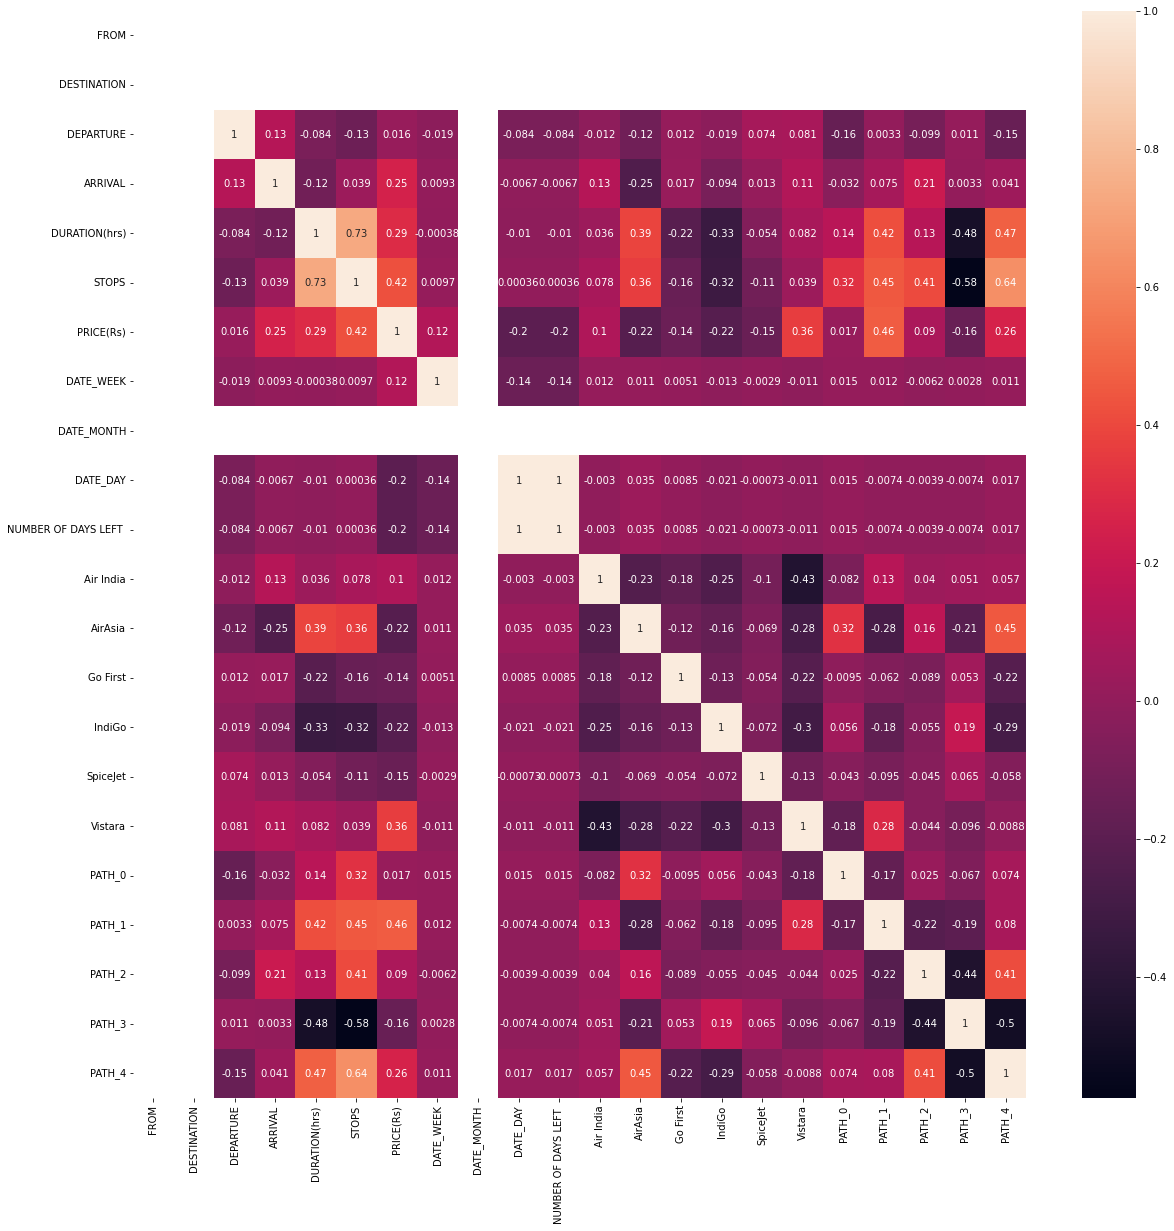

In [545]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,annot_kws={"size":10})
plt.show()

<B>SPLITTING THE DATASET INTO FEATURES AND TARGET!!

In [546]:
x=df1.drop(['PRICE(Rs)'],axis=1)

In [547]:
y=df1['PRICE(Rs)']

<B> CHECKING SKEWNESS OF THE PREDICTORS!

In [548]:
FEAT=[]
SKEW=[]
for i in x:
    FEAT.append(i)
    SKEW.append(df1[i].skew())

In [549]:
asa=pd.DataFrame({'FEATURES':FEAT,'SKEWNESS':SKEW})
asa.sort_values(by='SKEWNESS',ascending=False,inplace=True)
asa

,FEATURES,SKEWNESS
14,SpiceJet,5.552397
16,PATH_0,3.820808
12,Go First,2.939174
11,AirAsia,2.144959
13,IndiGo,1.998375
18,PATH_2,1.097984
10,Air India,1.093694
4,DURATION(hrs),0.907324
17,PATH_1,0.735697
15,Vistara,0.666809


In [550]:
df1=pd.concat([x,y],axis=1)

In [551]:
df1.head()

,FROM,DESTINATION,DEPARTURE,ARRIVAL,DURATION(hrs),STOPS,DATE_WEEK,DATE_MONTH,DATE_DAY,NUMBER OF DAYS LEFT,...,Go First,IndiGo,SpiceJet,Vistara,PATH_0,PATH_1,PATH_2,PATH_3,PATH_4,PRICE(Rs)
0,0,0,92.0,31.0,14.33,1,2,0,11,0,...,0,0,1,0,0,0,0,0,1,4581.0
1,0,0,84.0,93.0,2.08,0,2,0,11,0,...,0,0,1,0,0,0,0,1,0,5799.0
2,0,0,91.0,100.0,2.08,0,2,0,11,0,...,0,0,1,0,0,0,0,1,0,5799.0
3,0,0,106.0,4.0,2.33,0,2,0,11,0,...,0,1,0,0,0,0,0,1,0,5899.0
4,0,0,105.0,3.0,2.25,0,2,0,11,0,...,0,0,0,0,0,0,0,1,0,5955.0


<B>STANDARDISATION USING STANDARD SCALER

In [552]:
from sklearn.preprocessing import StandardScaler

In [553]:
sc=StandardScaler()

In [554]:
df1=pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)

In [557]:
df1.columns

Index(['FROM', 'DESTINATION', 'DEPARTURE', 'ARRIVAL', 'DURATION(hrs)', 'STOPS',
       'DATE_WEEK', 'DATE_MONTH', 'DATE_DAY', 'NUMBER OF DAYS LEFT ',
       'Air India', 'AirAsia', 'Go First', 'IndiGo', 'SpiceJet', 'Vistara',
       'PATH_0', 'PATH_1', 'PATH_2', 'PATH_3', 'PATH_4', 'PRICE(Rs)'],
      dtype='object')

In [559]:
x_scaled=df1.drop(['PRICE(Rs)'],axis=1)

In [560]:
y=df1['PRICE(Rs)']

<B> CHECKING MULTI-COLLINEARITY ISSUE!!

In [561]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [562]:
vif=pd.DataFrame()

In [563]:
vif['FEATURES']=x_scaled.columns

In [564]:
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [565]:
vif.sort_values(by='SCORES',ascending=False)

,FEATURES,SCORES
12,Go First,inf
15,Vistara,inf
8,DATE_DAY,inf
9,NUMBER OF DAYS LEFT,inf
10,Air India,inf
11,AirAsia,inf
13,IndiGo,inf
14,SpiceJet,inf
5,STOPS,7.238702
17,PATH_1,3.586909


<BR> AS WE CAN SEE DATE_DAY AND NUMBER OF DAYS LEFT ARE HAVING HIGH VARIANCE INFLATION FACTOR WE HAVE TO DROP ONE OF THEM!!<br>
DROPPING FROM, DESTINATION,DATE_MONTH AS THEY ARE HAVING NO CORREALTION WITH THE LABEL<BR>
    

In [566]:
x_scaled.drop(['NUMBER OF DAYS LEFT ','FROM','DESTINATION','DATE_MONTH'],axis=1,inplace=True)

In [567]:
vif=pd.DataFrame()
vif['FEATURES']=x_scaled.columns
vif['SCORES']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [568]:
vif.sort_values(by='SCORES',ascending=False).reset_index().iloc[6:,:]

,index,FEATURES,SCORES
6,3,STOPS,7.238702
7,13,PATH_1,3.586909
8,2,DURATION(hrs),2.867457
9,14,PATH_2,2.536345
10,16,PATH_4,2.403102
11,12,PATH_0,1.879391
12,15,PATH_3,1.846596
13,1,ARRIVAL,1.253806
14,0,DEPARTURE,1.115275
15,5,DATE_DAY,1.031850


SINCE ALL THE VARIANCE INFLATION SCORES OF REQUIRED FEATURES ARE LESS THAN 10 WE CAN CONTINUE WITH THESE FEATURES FOR THE MODEL BUILDING!!

<B> MODEL BUILDING!!

Linear Regression
----------------

In [588]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [589]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 108


TRAINING ACCURACY IS -49.95--AND TESTING ACCURACY IS 49.94


AT RANDOM STATE-- 198


TRAINING ACCURACY IS -50.0--AND TESTING ACCURACY IS 49.98


AT RANDOM STATE-- 199


TRAINING ACCURACY IS -49.88--AND TESTING ACCURACY IS 49.9


AT RANDOM STATE-- 416


TRAINING ACCURACY IS -50.16--AND TESTING ACCURACY IS 50.23


AT RANDOM STATE-- 686


TRAINING ACCURACY IS -50.17--AND TESTING ACCURACY IS 50.2


AT RANDOM STATE-- 999


TRAINING ACCURACY IS -49.93--AND TESTING ACCURACY IS 49.94


CONSIDERING RANDOM STATE AS 686!!

In [590]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=686)

In [591]:
lr.fit(x_train,y_train)

LinearRegression()

CHECKING THE CROSS VAL SCORES AT DIFFERENT CVs

In [592]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")
    



CROSS VAL IS AT CV = 2 is 25.2


CROSS VAL IS AT CV = 3 is 42.82


CROSS VAL IS AT CV = 4 is 42.12


CROSS VAL IS AT CV = 5 is 44.57


CROSS VAL IS AT CV = 6 is 44.35


CROSS VAL IS AT CV = 7 is 39.23


CROSS VAL IS AT CV = 8 is 43.17


CROSS VAL IS AT CV = 9 is 43.48


CONSIDERING CV AS 5!

In [593]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=17
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=5).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [594]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 50.17

mean sqaured error is -- 0.49820697705781036

root mean sqaured error is -- 0.7058377838128321

mean aboslute error is -- 0.4777238503094029

difference between rmse and mae is  0.22811393350342923


Testing SCORE FOR THE LinearRegression() is 50.2


CROSS VAL SCORE IS -- 44.57

adjusted r2_score for LinearRegression() is 49.37

mean sqaured error is -- 0.4974163113722736

mean aboslute error is - 0.46912895080243294

root mean sqaured error is -- 0.7052774711929154

mean aboslute error is -- 0.46912895080243294

difference between rmse and mae is  0.23614852039048245


MODEL 2)-DECISION TREE
----------------------

In [595]:
from sklearn.tree import DecisionTreeRegressor

In [596]:
dt=DecisionTreeRegressor()

In [597]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 1.652176739177324e-33

root mean sqaured error is -- 4.0646976999247115e-17

mean aboslute error is -- 1.1669653778605792e-17

difference between rmse and mae is  2.8977323220641323e-17


Testing SCORE FOR THE DecisionTreeRegressor() is 35.88


CROSS VAL SCORE IS -- 36.51

adjusted r2_score for DecisionTreeRegressor() is 34.81

mean sqaured error is -- 0.6405325911076285

mean aboslute error is - 0.36752446592077254

root mean sqaured error is -- 0.8003328002197764

mean aboslute error is -- 0.36752446592077254

difference between rmse and mae is  0.43280833429900384


In [598]:
from sklearn.model_selection import GridSearchCV

#### HYPERPARAMETER TUNING THE PARAMETERS:

In [599]:
dt=DecisionTreeRegressor()

In [602]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[5,6,8],
    'random_state':[404,350,472],
    'max_depth':[20,25,30,10]}

In [603]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [604]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [20, 25, 30, 10],
                         'min_samples_leaf': [5, 6, 8],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [404, 350, 472]})

In [605]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'random_state': 472}

In [606]:
dt=lgt.best_estimator_

In [607]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_leaf=6, random_state=472) is 71.11

mean sqaured error is -- 0.2888421178815731

root mean sqaured error is -- 0.537440338904304

mean aboslute error is -- 0.3002121173811614

difference between rmse and mae is  0.2372282215231426


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=20, min_samples_leaf=6, random_state=472) is 54.6


CROSS VAL SCORE IS -- 37.2

adjusted r2_score for DecisionTreeRegressor(max_depth=20, min_samples_leaf=6, random_state=472) is 53.84

mean sqaured error is -- 0.4535569180818089

mean aboslute error is - 0.3866738869794829

root mean sqaured error is -- 0.6734663451738393

mean aboslute error is -- 0.3866738869794829

difference between rmse and mae is  0.2867924581943564


MODEL 3)  ADA BOOST REGRESSOR
-----------------------

In [608]:
from sklearn.ensemble import AdaBoostRegressor

In [609]:
adr=AdaBoostRegressor()

In [610]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [611]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 38.03

mean sqaured error is -- 0.6195331496258512

root mean sqaured error is -- 0.7871042812905106

mean aboslute error is -- 0.676723818997969

difference between rmse and mae is  0.11038046229254161


Testing SCORE FOR THE AdaBoostRegressor() is 25.61


CROSS VAL SCORE IS -- 27.7

adjusted r2_score for AdaBoostRegressor() is 24.37

mean sqaured error is -- 0.7430597923246146

mean aboslute error is - 0.7397554790768298

root mean sqaured error is -- 0.8620091602324274

mean aboslute error is -- 0.7397554790768298

difference between rmse and mae is  0.12225368115559754


HYPERPARAMETER TUNING----------------
----------------------

In [612]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [613]:
para={
     'n_estimators':[48,52,60,72,80],
     'learning_rate':[0.001,0.025,0.03,0.0025,0.01,0.1],
     'random_state':[232,345,678,472]}


In [614]:
ags=GridSearchCV(adr,param_grid=para)

In [615]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.0025, 0.01,
                                           0.1],
                         'n_estimators': [48, 52, 60, 72, 80],
                         'random_state': [232, 345, 678, 472]})

In [616]:
ags.best_params_

{'learning_rate': 0.1, 'n_estimators': 72, 'random_state': 472}

In [617]:
adr=ags.best_estimator_

In [618]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.1, n_estimators=72, random_state=472) is 52.82

mean sqaured error is -- 0.4716813126013823

root mean sqaured error is -- 0.6867905886086255

mean aboslute error is -- 0.5129472382455494

difference between rmse and mae is  0.17384335036307608


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.1, n_estimators=72, random_state=472) is 48.24


CROSS VAL SCORE IS -- 34.71

adjusted r2_score for AdaBoostRegressor(learning_rate=0.1, n_estimators=72, random_state=472) is 47.38

mean sqaured error is -- 0.5170110039311131

mean aboslute error is - 0.5194945690422781

root mean sqaured error is -- 0.7190347724075055

mean aboslute error is -- 0.5194945690422781

difference between rmse and mae is  0.19954020336522738


MODEL 4)-RANDOM FOREST REGRESSOR
------------------

In [619]:
from sklearn.ensemble import RandomForestRegressor

In [620]:
rfr=RandomForestRegressor()

In [621]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [622]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 94.79

mean sqaured error is -- 0.05204925766357845

root mean sqaured error is -- 0.2281430640268918

mean aboslute error is -- 0.12261654864132435

difference between rmse and mae is  0.10552651538556745


Testing SCORE FOR THE RandomForestRegressor() is 72.52


CROSS VAL SCORE IS -- 52.21

adjusted r2_score for RandomForestRegressor() is 72.06

mean sqaured error is -- 0.2744812598884678

mean aboslute error is - 0.29152264417558005

root mean sqaured error is -- 0.5239095913308591

mean aboslute error is -- 0.29152264417558005

difference between rmse and mae is  0.23238694715527908


CONCLUSION<BR>
-----------------------
AS WE CAN SEE ROOT MEAN SQUARED ERROR IS QUIET LOW IN CASE OF LINEAR REGRESSOR 0.4974163113722736<BR><BR>
DIFFERENCE BETWEEN RSME AND MAE IS ALSO LOW 0.236 HINTING TOWARDS THE LOW SPREAD IN DATA AROUND THE FIT LINE <BR><BR>
TESTING ACCURACY AND ADJUSTED R2 SCORES ARE ALSO RELATABLY HIGH AS COMPARED TO OTHER AND THEIR DIFFERENCE BEING LOW <BR><BR>
DIFFERENCE BETWEEN TRAINING AND TESTING SCORES ARE ALSO VERY LOW AS COMPARED TO OTHER MODELS WE CAN CONCLUDE THAT LINEAR REGRESSION IS OUR BEST MODEL FOR THIS PROBLEM

SAVING THE MODEL

In [623]:
import pickle

In [624]:
with open('LR_PRED','wb') as files:
    pickle.dump(lr,files)